In [4]:
import pandas as pd
import numpy as np

def compute_rsi(series, period=14):
    delta = series.diff()

    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # Exponential Moving Average (lebih halus daripada SMA)
    roll_up = pd.Series(gain).ewm(span=period, adjust=False).mean()
    roll_down = pd.Series(loss).ewm(span=period, adjust=False).mean()

    rs = roll_up / roll_down
    rsi = 100 - (100 / (1 + rs))

    return rsi

def compute_tech_var(df, target_cols, lags=[1,3], mas=[3,6], rsi_period=14):
    df = df.copy()

    for col in target_cols:
        # Lag features
        for lag in lags:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)

        # Moving averages
        for ma in mas:
            df[f"{col}_ma{ma}"] = df[col].rolling(window=ma).mean()

        # MoM Growth
        df[f"{col}_mom_growth"] = df[col].pct_change()

        # Rolling Volatility
        for ma in mas:
            df[f"{col}_vol{ma}"] = df[col].rolling(window=ma).std()

        # Market Share
        df[f"{col}_share"] = df[col] / df[target_cols].sum(axis=1)

        # RSI
        df[f"{col}_rsi{rsi_period}"] = compute_rsi(df[col], period=rsi_period)

    return df


In [5]:
%ls

arimax-Copy1.ipynb  BBRI_Computed.csv  sarimax.ipynb
arimax.ipynb        merged_data.csv    Untitled.ipynb


In [6]:
data_link = {
    "kurs": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/kurs.csv",
    "inflasi": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/inflasi.csv",
    "bi_rate": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/bi_rate_data.csv",
    "data_eksternal": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/data_eksternal_lengkap.csv",
    "dataset_utama": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/dataCarSale2021-2025.csv",
}

In [7]:
import numpy as np
import torch
import random


SEED = 404
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

In [8]:
dataframes = {}
for name, link in data_link.items():
    # Correct the raw link for direct download
    raw_link = link.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    try:
        dataframes[name] = pd.read_csv(raw_link)
        print(f"Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"Error loading '{name}' data: {e}")

# Display the first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\n--- {name} Data ---")
    display(df.tail(20))

Successfully loaded 'kurs' data.
Successfully loaded 'inflasi' data.
Successfully loaded 'bi_rate' data.
Successfully loaded 'data_eksternal' data.
Successfully loaded 'dataset_utama' data.

--- kurs Data ---


,jpy,usd,tanggal
3792,10464,9412,2010-01-29
3793,10469,9455,2010-01-28
3794,10551,9427,2010-01-27
3795,10363,9362,2010-01-26
3796,10411,9387,2010-01-25
3797,10482,9435,2010-01-22
3798,10238,9366,2010-01-21
3799,10227,9321,2010-01-20
3800,10232,9271,2010-01-19
3801,10224,9276,2010-01-18



--- inflasi Data ---


,date,inflasi
167,2011-08-01,4.79
168,2011-07-01,4.61
169,2011-06-01,5.54
170,2011-05-01,5.98
171,2011-04-01,6.16
172,2011-03-01,6.65
173,2011-02-01,6.84
174,2011-01-01,7.02
175,2010-12-01,6.96
176,2010-11-01,6.33



--- bi_rate Data ---


,Tanggal,BI Rate
172,01/5/2024,6.25
173,01/6/2024,6.25
174,01/7/2024,6.25
175,01/8/2024,6.25
176,01/9/2024,6
177,01/10/2024,6
178,01/11/2024,6
179,01/12/2024,6
180,01/1/2025,5.75
181,01/2/2025,5.75



--- data_eksternal Data ---


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
112,2019-05-01,14178.0,11048.0,11761.0,8775.0,29103.0
113,2019-06-01,6020.0,7563.0,11968.0,7236.0,18541.0
114,2019-07-01,13013.0,13894.0,14600.0,8172.0,29362.0
115,2019-08-01,15415.0,11909.0,14240.0,8622.0,28929.0
116,2019-09-01,17537.0,12431.0,12712.0,8118.0,31831.0
117,2019-10-01,17530.0,14503.0,13983.0,8721.0,30944.0
118,2019-11-01,15911.0,13210.0,11974.0,10077.0,28970.0
119,2019-12-01,10855.0,12305.0,13327.0,10116.0,27453.0
120,2020-01-01,14173.0,12777.0,12295.0,10512.0,24119.0
121,2020-02-01,15778.0,11373.0,10903.0,8613.0,25053.0



--- dataset_utama Data ---


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
34,11/1/2023,7466.000,10307.000,6600.000,6602.000,24622.000
35,1/1/2024,7348.196,3222.119,5076.613,3242.000,10366.353
36,2/1/2024,6021.329,3829.318,4349.666,2999.000,10770.845
37,3/1/2024,6591.920,5212.549,4708.298,3503.000,12301.583
38,4/1/2024,7510.349,3435.000,4898.000,2555.000,9116.144
39,5/1/2024,9336.778,5055.000,5522.211,2736.000,9445.956
40,6/1/2024,7717.478,2875.069,4931.160,2198.000,10798.472
41,7/1/2024,7908.271,3703.054,5335.011,2557.000,13457.905
42,8/1/2024,7984.985,3574.084,6498.000,2582.000,11031.562
43,9/1/2024,7941.067,4418.000,6685.000,2677.000,9911.210


In [9]:
import pandas as pd

# --- Load data kurs ---
# Pastikan sudah terisi dari dataframes['kurs']
df_kurs = dataframes['kurs'].copy()

# Bersihkan kolom jpy (ada tanda koma)
df_kurs["jpy"] = df_kurs["jpy"].astype(str).str.replace(",", ".").astype(float)
df_kurs["usd"] = df_kurs["usd"].astype(float)
df_kurs["tanggal"] = pd.to_datetime(df_kurs["tanggal"])

# Agregasi kurs per bulan (ambil rata-rata)
kurs_monthly = (
    df_kurs.groupby(df_kurs["tanggal"].dt.to_period("M"))
    [["jpy", "usd"]]
    .mean()
    .reset_index()
)
kurs_monthly["tanggal"] = kurs_monthly["tanggal"].dt.to_timestamp()

# --- Load data inflasi ---
# Pastikan sudah terisi dari dataframes['inflasi']
df_inflasi = dataframes['inflasi'].copy()
df_inflasi["date"] = pd.to_datetime(df_inflasi["date"])

# Data inflasi sudah per bulan → hanya perlu diurutkan ascending
inflasi_monthly = df_inflasi.sort_values("date").reset_index(drop=True)

# --- Cek hasil ---
print("\n=== Kurs Monthly (aggregated) ===")
print(kurs_monthly.head())

print("\n=== Inflasi Monthly (sorted ascending) ===")
print(inflasi_monthly.head())



=== Kurs Monthly (aggregated) ===
     tanggal           jpy          usd
0 2010-01-01  10220.055000  9321.950000
1 2010-02-01  10405.052632  9395.105263
2 2010-03-01  10187.445455  9219.681818
3 2010-04-01   9711.700000  9072.333333
4 2010-05-01  10020.826316  9229.157895

=== Inflasi Monthly (sorted ascending) ===
        date  inflasi
0 2010-01-01     3.72
1 2010-02-01     3.81
2 2010-03-01     3.43
3 2010-04-01     3.91
4 2010-05-01     4.16


In [10]:
dataframes['kurs'] = kurs_monthly.copy()
dataframes['inflasi'] = inflasi_monthly.copy()

In [11]:
for key in dataframes:
  display(dataframes[key].head(10))

,tanggal,jpy,usd
0,2010-01-01,10220.055000,9321.950000
1,2010-02-01,10405.052632,9395.105263
2,2010-03-01,10187.445455,9219.681818
3,2010-04-01,9711.700000,9072.333333
4,2010-05-01,10020.826316,9229.157895
5,2010-06-01,10111.295455,9194.000000
6,2010-07-01,10376.954545,9094.454545
7,2010-08-01,10553.047619,9016.761905
8,2010-09-01,10688.473684,9020.842105
9,2010-10-01,10958.714286,8972.904762


,date,inflasi
0,2010-01-01,3.72
1,2010-02-01,3.81
2,2010-03-01,3.43
3,2010-04-01,3.91
4,2010-05-01,4.16
5,2010-06-01,5.05
6,2010-07-01,6.22
7,2010-08-01,6.44
8,2010-09-01,5.80
9,2010-10-01,5.67


,Tanggal,BI Rate
0,01/1/2010,6.5
1,01/2/2010,6.5
2,01/3/2010,6.5
3,01/4/2010,6.5
4,01/5/2010,6.5
5,01/6/2010,6.5
6,01/7/2010,6.5
7,01/8/2010,6.5
8,01/9/2010,6.5
9,01/10/2010,6.5


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,9485.0,4439.0,9544.0,6043.0,21024.0
5,2010-06-01,11886.0,5965.0,8875.0,6704.0,26006.0
6,2010-07-01,11524.0,6006.0,9586.0,5623.0,27737.0
7,2010-08-01,9741.0,6025.0,9310.0,6063.0,22638.0
8,2010-09-01,6652.0,3504.0,7299.0,4924.0,18413.0
9,2010-10-01,10708.0,5970.0,9407.0,7015.0,25322.0


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,1/1/2021,8993.0,7231.0,9108.0,6400.0,15474.0
1,2/1/2021,9412.0,6812.0,7567.0,4600.0,14645.0
2,3/1/2021,16770.0,11350.0,13088.0,8669.0,26034.0
3,4/1/2021,15861.0,8474.0,13820.0,8100.0,22618.0
4,5/1/2021,8310.0,5832.0,10160.0,5341.0,17361.0
5,6/1/2021,15481.0,8782.0,8277.0,8965.0,22310.0
6,7/1/2021,9284.0,9030.0,13453.0,6274.0,20950.0
7,8/1/2021,14408.0,7337.0,13720.0,10021.0,28418.0
8,9/1/2021,17529.0,3453.0,12200.0,7515.0,32596.0
9,10/1/2021,17020.0,5861.0,13109.0,7624.0,20633.0


In [12]:
# Select the two dataframes to combine
df_eksternal = dataframes['data_eksternal'].copy()
df_utama = dataframes['dataset_utama'].copy()

# Standardize date column names and convert to datetime
df_eksternal = df_eksternal.rename(columns={'waktu': 'date'})
df_eksternal['date'] = pd.to_datetime(df_eksternal['date'])

df_utama = df_utama.rename(columns={'waktu': 'date'})
df_utama['date'] = pd.to_datetime(df_utama['date'])

# Concatenate the dataframes, placing df_utama below df_eksternal
combined_df = pd.concat([df_eksternal, df_utama], ignore_index=True)

# Sort by date
combined_df = combined_df.sort_values('date').reset_index(drop=True)

print("Combined DataFrame (data_eksternal on top, dataset_utama below):")
display(combined_df.head())
display(combined_df.tail())

Combined DataFrame (data_eksternal on top, dataset_utama below):


,date,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,9485.0,4439.0,9544.0,6043.0,21024.0


,date,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
181,2025-03-01,6371.692,2382.924,7380.0,3223.220,13711.773
182,2025-04-01,6075.811,1590.411,5197.0,2767.379,13779.300
183,2025-05-01,7537.632,3148.000,5897.0,2004.813,9313.266
184,2025-06-01,5992.367,2360.797,6501.0,3499.336,8712.383
185,2025-07-01,6354.101,4171.007,6121.0,2666.235,7617.122


In [13]:
# Load the original bi_rate dataframe
bi_rate_df = dataframes['bi_rate'].copy()

# Convert 'Tanggal' to datetime, specifying the original format
bi_rate_df['Tanggal'] = pd.to_datetime(bi_rate_df['Tanggal'], format='%d/%m/%Y', errors='coerce')

# Set the date to the first day of the month and format as YYYY-MM-DD
bi_rate_df['Tanggal'] = bi_rate_df['Tanggal'].dt.to_period('M').dt.to_timestamp('D') + pd.offsets.MonthBegin(0)
bi_rate_df['Tanggal'] = bi_rate_df['Tanggal'].dt.strftime('%Y-%m-%d')

# Handle potential non-numeric 'BI Rate' values by coercing to numeric
bi_rate_df['BI Rate'] = pd.to_numeric(bi_rate_df['BI Rate'], errors='coerce')

# Update the dataframe in the dataframes dictionary
dataframes['bi_rate'] = bi_rate_df

print("Processed dataframes['bi_rate'] with 'Tanggal' in YYYY-MM-DD format:")
display(dataframes['bi_rate'].head())

Processed dataframes['bi_rate'] with 'Tanggal' in YYYY-MM-DD format:


,Tanggal,BI Rate
0,2010-01-01,6.5
1,2010-02-01,6.5
2,2010-03-01,6.5
3,2010-04-01,6.5
4,2010-05-01,6.5


In [14]:
kurs = dataframes['kurs'].copy()
inflasi = dataframes['inflasi'].copy()
bi_rate = dataframes['bi_rate'].copy()
data = combined_df.copy()

In [15]:
def combineDf(dfs):
  return pd.concat(dfs, ignore_index=True)

In [16]:
dfs = [kurs, inflasi, bi_rate, data]

In [17]:
# Standardize date columns and names before merging

# kurs
kurs_processed = dfs[0].copy()
kurs_processed = kurs_processed.rename(columns={'tanggal': 'date'})
# Ensure date is datetime and set to first of month if needed (assuming it's already monthly from previous steps)
kurs_processed['date'] = pd.to_datetime(kurs_processed['date'])


# inflasi
inflasi_processed = dfs[1].copy()
# Ensure date is datetime and set to first of month if needed (assuming it's already monthly from previous steps)
inflasi_processed['date'] = pd.to_datetime(inflasi_processed['date'])


# bi_rate
bi_rate_processed = dfs[2].copy()
bi_rate_processed = bi_rate_processed.rename(columns={'Tanggal': 'date'})
# Ensure date is datetime and set to first of month if needed (assuming it's already processed in 8xgidzZ0qaHj)
bi_rate_processed['date'] = pd.to_datetime(bi_rate_processed['date'])
# Handle potential duplicates after standardizing date
bi_rate_processed['BI Rate'] = pd.to_numeric(bi_rate_processed['BI Rate'], errors='coerce')
bi_rate_processed = bi_rate_processed.groupby('date')['BI Rate'].mean().reset_index()


# data (combined_df)
data_processed = dfs[3].copy()
# Ensure date is datetime and set to first of month if needed (assuming it's already processed in h7AI2EbBM80d)
data_processed['date'] = pd.to_datetime(data_processed['date'])
# Handle potential duplicates after standardizing date
# Assuming all columns except date should be averaged if dates are duplicated
numeric_cols = data_processed.select_dtypes(include=np.number).columns.tolist()
data_processed = data_processed.groupby('date')[numeric_cols].mean().reset_index()


# Merge all dataframes
merged_all_df = kurs_processed
merged_all_df = pd.merge(merged_all_df, inflasi_processed, on='date', how='outer')
merged_all_df = pd.merge(merged_all_df, bi_rate_processed, on='date', how='outer')
merged_all_df = pd.merge(merged_all_df, data_processed, on='date', how='outer')

# Sort by date
merged_all_df = merged_all_df.sort_values('date').reset_index(drop=True)

print("Merged DataFrame (all dataframes from dfs list):")
display(merged_all_df.head(10))
display(merged_all_df.tail(10))

Merged DataFrame (all dataframes from dfs list):


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0
5,2010-06-01,10111.295455,9194.000000,5.05,6.5,11886.0,5965.0,8875.0,6704.0,26006.0
6,2010-07-01,10376.954545,9094.454545,6.22,6.5,11524.0,6006.0,9586.0,5623.0,27737.0
7,2010-08-01,10553.047619,9016.761905,6.44,6.5,9741.0,6025.0,9310.0,6063.0,22638.0
8,2010-09-01,10688.473684,9020.842105,5.80,6.5,6652.0,3504.0,7299.0,4924.0,18413.0
9,2010-10-01,10958.714286,8972.904762,5.67,6.5,10708.0,5970.0,9407.0,7015.0,25322.0


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
182,2025-03-01,11097.894737,16538.526316,1.03,5.75,6371.692,2382.924,7380.0,3223.220,13711.773
183,2025-04-01,11771.125000,16904.000000,1.95,5.75,6075.811,1590.411,5197.0,2767.379,13779.300
184,2025-05-01,11455.470588,16522.823529,1.60,5.50,7537.632,3148.000,5897.0,2004.813,9313.266
185,2025-06-01,11343.555556,16391.944444,1.87,5.50,5992.367,2360.797,6501.0,3499.336,8712.383
186,2025-07-01,11154.869565,16357.782609,2.37,5.25,6354.101,4171.007,6121.0,2666.235,7617.122
187,2025-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,2025-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,2025-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,2025-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2025-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Save the merged dataframe to a CSV file
merged_all_df.to_csv('merged_data.csv', index=False)

print("merged_all_df saved to /tmp/merged_data.csv")

merged_all_df saved to /tmp/merged_data.csv


In [19]:
processed_df = compute_tech_var(merged_all_df, ["TOYOTA", "DAIHATSU","MITSUBISHI","HONDA","SUZUKI"])

/tmp/ipykernel_10271/2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipykernel_10271/2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipykernel_10271/2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ip

In [20]:
import pandas as pd

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# Display the head of the processed_df
display(processed_df.head())
display(processed_df.head())

,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA,TOYOTA_lag1,TOYOTA_lag3,TOYOTA_ma3,TOYOTA_ma6,TOYOTA_mom_growth,TOYOTA_vol3,TOYOTA_vol6,TOYOTA_share,TOYOTA_rsi14,DAIHATSU_lag1,DAIHATSU_lag3,DAIHATSU_ma3,DAIHATSU_ma6,DAIHATSU_mom_growth,DAIHATSU_vol3,DAIHATSU_vol6,DAIHATSU_share,DAIHATSU_rsi14,MITSUBISHI_lag1,MITSUBISHI_lag3,MITSUBISHI_ma3,MITSUBISHI_ma6,MITSUBISHI_mom_growth,MITSUBISHI_vol3,MITSUBISHI_vol6,MITSUBISHI_share,MITSUBISHI_rsi14,HONDA_lag1,HONDA_lag3,HONDA_ma3,HONDA_ma6,HONDA_mom_growth,HONDA_vol3,HONDA_vol6,HONDA_share,HONDA_rsi14,SUZUKI_lag1,SUZUKI_lag3,SUZUKI_ma3,SUZUKI_ma6,SUZUKI_mom_growth,SUZUKI_vol3,SUZUKI_vol6,SUZUKI_share,SUZUKI_rsi14
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108141,NaN
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0,20798.0,NaN,NaN,NaN,0.045918,NaN,NaN,0.466943,100.000000,8302.0,NaN,NaN,NaN,-0.094435,NaN,NaN,0.161379,0.000000,6855.0,NaN,NaN,NaN,0.202918,NaN,NaN,0.177006,100.000000,3755.0,NaN,NaN,NaN,0.180027,NaN,NaN,0.095114,100.000000,4815.0,NaN,NaN,NaN,-0.036760,NaN,NaN,0.099558,0.000000
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0,21753.0,NaN,22924.333333,NaN,0.205443,2895.506922,NaN,0.478888,100.000000,7518.0,NaN,7968.000000,NaN,0.075286,404.667765,NaN,0.147637,45.444813,8246.0,NaN,8056.333333,NaN,0.099685,1118.625198,NaN,0.165607,100.000000,4431.0,NaN,4455.000000,NaN,0.168811,712.303306,NaN,0.094583,100.000000,4638.0,NaN,5218.666667,NaN,0.337430,857.039283,NaN,0.113284,91.073091
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0,26222.0,20798.0,24118.666667,NaN,-0.070208,2246.019665,NaN,0.448131,71.375015,8084.0,8302.0,8300.000000,NaN,0.150173,909.445985,NaN,0.170900,74.323277,9068.0,6855.0,8958.000000,NaN,0.054257,663.870469,NaN,0.175716,100.000000,5179.0,3755.0,4921.333333,NaN,-0.004827,424.825062,NaN,0.094732,97.883182,6203.0,4815.0,5618.000000,NaN,-0.030630,854.005269,NaN,0.110521,80.768742
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0,24381.0,21753.0,23875.666667,NaN,-0.137689,2635.587664,NaN,0.416028,44.546204,9298.0,7518.0,8955.666667,NaN,0.020112,760.653885,NaN,0.187692,76.531273,9560.0,8246.0,9390.666667,NaN,-0.001674,279.552023,NaN,0.188859,99.185876,5154.0,4431.0,4924.000000,NaN,-0.138727,420.208282,NaN,0.087840,57.627494,6013.0,4638.0,6086.333333,NaN,0.004989,102.143690,NaN,0.119580,81.157154


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA,TOYOTA_lag1,TOYOTA_lag3,TOYOTA_ma3,TOYOTA_ma6,TOYOTA_mom_growth,TOYOTA_vol3,TOYOTA_vol6,TOYOTA_share,TOYOTA_rsi14,DAIHATSU_lag1,DAIHATSU_lag3,DAIHATSU_ma3,DAIHATSU_ma6,DAIHATSU_mom_growth,DAIHATSU_vol3,DAIHATSU_vol6,DAIHATSU_share,DAIHATSU_rsi14,MITSUBISHI_lag1,MITSUBISHI_lag3,MITSUBISHI_ma3,MITSUBISHI_ma6,MITSUBISHI_mom_growth,MITSUBISHI_vol3,MITSUBISHI_vol6,MITSUBISHI_share,MITSUBISHI_rsi14,HONDA_lag1,HONDA_lag3,HONDA_ma3,HONDA_ma6,HONDA_mom_growth,HONDA_vol3,HONDA_vol6,HONDA_share,HONDA_rsi14,SUZUKI_lag1,SUZUKI_lag3,SUZUKI_ma3,SUZUKI_ma6,SUZUKI_mom_growth,SUZUKI_vol3,SUZUKI_vol6,SUZUKI_share,SUZUKI_rsi14
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108141,NaN
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0,20798.0,NaN,NaN,NaN,0.045918,NaN,NaN,0.466943,100.000000,8302.0,NaN,NaN,NaN,-0.094435,NaN,NaN,0.161379,0.000000,6855.0,NaN,NaN,NaN,0.202918,NaN,NaN,0.177006,100.000000,3755.0,NaN,NaN,NaN,0.180027,NaN,NaN,0.095114,100.000000,4815.0,NaN,NaN,NaN,-0.036760,NaN,NaN,0.099558,0.000000
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0,21753.0,NaN,22924.333333,NaN,0.205443,2895.506922,NaN,0.478888,100.000000,7518.0,NaN,7968.000000,NaN,0.075286,404.667765,NaN,0.147637,45.444813,8246.0,NaN,8056.333333,NaN,0.099685,1118.625198,NaN,0.165607,100.000000,4431.0,NaN,4455.000000,NaN,0.168811,712.303306,NaN,0.094583,100.000000,4638.0,NaN,5218.666667,NaN,0.337430,857.039283,NaN,0.113284,91.073091
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0,26222.0,20798.0,24118.666667,NaN,-0.070208,2246.019665,NaN,0.448131,71.375015,8084.0,8302.0,8300.000000,NaN,0.150173,909.445985,NaN,0.170900,74.323277,9068.0,6855.0,8958.000000,NaN,0.054257,663.870469,NaN,0.175716,100.000000,5179.0,3755.0,4921.333333,NaN,-0.004827,424.825062,NaN,0.094732,97.883182,6203.0,4815.0,5618.000000,NaN,-0.030630,854.005269,NaN,0.110521,80.768742
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0,24381.0,21753.0,23875.666667,NaN,-0.137689,2635.587664,NaN,0.416028,44.546204,9298.0,7518.0,8955.666667,NaN,0.020112,760.653885,NaN,0.187692,76.531273,9560.0,8246.0,9390.666667,NaN,-0.001674,279.552023,NaN,0.188859,99.185876,5154.0,4431.0,4924.000000,NaN,-0.138727,420.208282,NaN,0.087840,57.627494,6013.0,4638.0,6086.333333,NaN,0.004989,102.143690,NaN,0.119580,81.157154


In [21]:
!pip install u8darts


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [22]:
!pip install pytorch_lightning


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [23]:
# --- 0) Copy & index bulanan yang bersih ---
df = processed_df.copy()[:-5]
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df = df.set_index('date').sort_index()

# Pastikan bulanan, First-of-month
all_months = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')
df = df.reindex(all_months)

df = df.interpolate(method='time', limit_direction='both')
df = df.ffill().bfill()

colors = ['#00D4AA', '#FF6B9D', '#C44569', '#F8B500', '#6C5CE7']
brands = ['DAIHATSU', 'HONDA', 'MITSUBISHI', 'SUZUKI', 'TOYOTA']

In [24]:
# Handle missing values using forward fill and then backward fill
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

# Replace 0 values with a small number to avoid issues with log transformation
df = df.replace(0, 1e-9)

/tmp/ipykernel_10271/653852351.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipykernel_10271/653852351.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [25]:
from scipy.stats import mstats
# --- 3) Winsorize target SEBELUM log (5% bawah/atas) ---
lower_percent = 0.05
upper_percent = 0.05

for brand in brands:
    w = mstats.winsorize(df[brand].to_numpy(), limits=(lower_percent, upper_percent))
    # kembalikan sebagai Series supaya index & dtype rapi
    df[brand] = pd.Series(np.asarray(w, dtype=float), index=df.index, name=brand)

# --- 4) Ganti nilai <= 0 jadi kecil (hindari -inf di log) ---
for brand in brands:
    df[brand] = df[brand].clip(lower=1e-9)


In [26]:
exog = [i for i in list(df.columns) if i not in brands]

In [27]:
for brand in brands:
  print(f"min: {min(df[brand])}, max: {max(df[brand])}")

min: 6354.101, max: 18788.0
min: 2165.0, max: 16659.0
min: 4931.16, max: 16156.0
min: 2736.0, max: 14390.0
min: 9445.956, max: 38662.0


In [28]:
import numpy as np
import pandas as pd

scaled_series = {b: np.log1p(df[b]) for b in df.columns}

/opt/venvs/global-python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
# Jika ingin transform exog: (opsional)
# - log1p untuk variabel positif
# - atau standardize z-score
# Di sini contoh: biarkan exog tetap di skala aslinya, tapi bersih dari NaN/Inf.
if exog:
    X = df[exog].copy()
    # Hindari pengisian 0 yang agresif—pakai ffill/bfill lagi kalau masih ada missing
    X = X.ffill().bfill()
else:
    X = pd.DataFrame(index=df.index)


In [30]:
import matplotlib.pyplot as plt

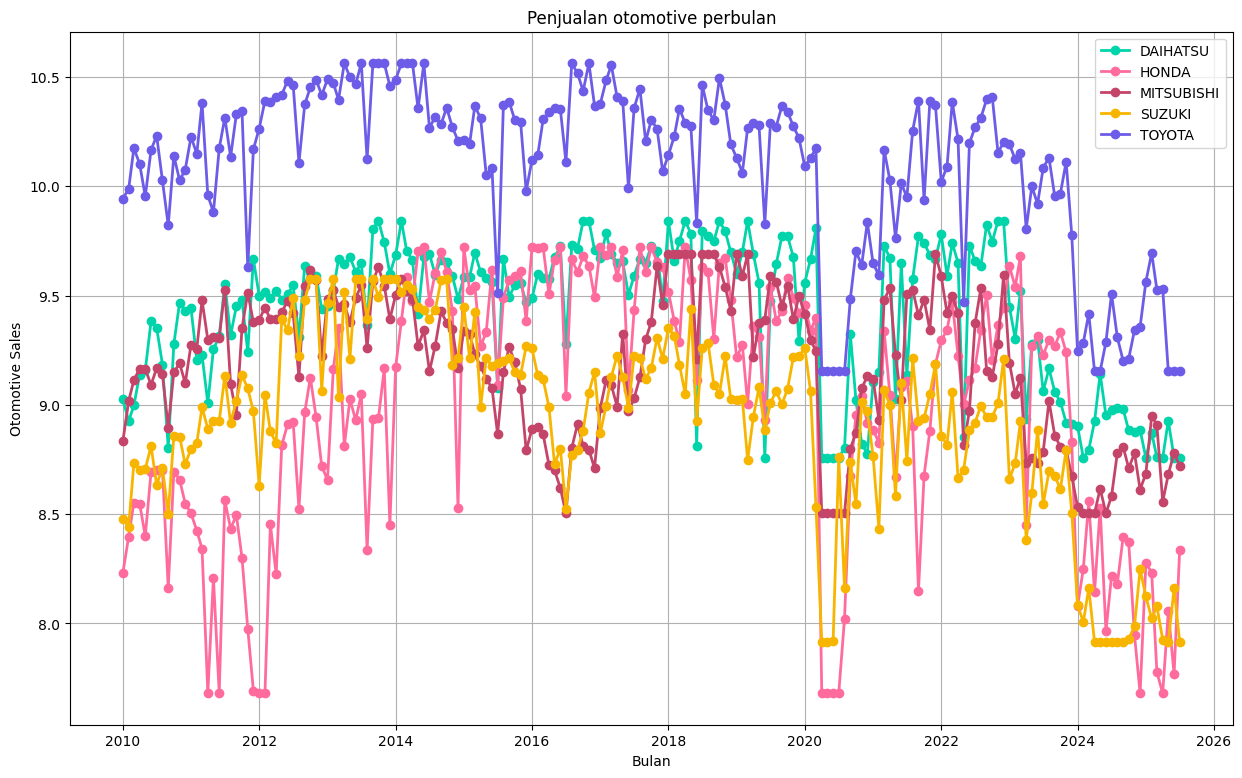

In [31]:
plt.figure(figsize=(15,9))
for i, brand in enumerate(brands):
    plt.plot(df.index, scaled_series[brand], marker='o', color=colors[i], label=brand, linewidth=2.0)
plt.title('Penjualan otomotive perbulan')
plt.xlabel('Bulan')
plt.ylabel('Otomotive Sales')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analisis Tools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
# --- 6) Fungsi ADF & penentuan differencing yang benar (kumulatif) ---
def adf_pval(series):
    series = pd.Series(series).dropna()
    if len(series) < 20:
        return 0.0  # kalau terlalu pendek, anggap stasioner agar tidak over-diff
    try:
        return adfuller(series, autolag='AIC')[1]
    except Exception:
        return 1.0

def find_d(series, max_d=2):
    s = series.dropna().copy()
    for d in range(max_d + 1):
        if adf_pval(s) <= 0.05:
            return d
        s = s.diff().dropna()  # perhatikan: kumulatif
    return max_d

def find_D(series, m=12, max_D=1):
    # simple heuristic: coba seasonal diff sekali jika non-stasioner
    s = series.dropna().copy()
    if m is None or m < 2:
        return 0
    D = 0
    if adf_pval(s) > 0.05:         # non-stasioner
        s_s = s.diff(m).dropna()
        if adf_pval(s_s) <= 0.05:
            D = 1
    return min(D, max_D)

# --- 7) Hitung d & D untuk tiap brand (target saja) ---
differencing_steps = {}
seasonal_steps = {}  # D (musiman)

In [34]:
m = 12  # bulanan
for b in brands:
    d = find_d(scaled_series[b], max_d=2)
    D = find_D(scaled_series[b], m=m, max_D=1)
    differencing_steps[b] = d
    seasonal_steps[b] = D
    print(f"{b}: d={d}, D={D}")


DAIHATSU: d=1, D=1
HONDA: d=0, D=0
MITSUBISHI: d=1, D=0
SUZUKI: d=1, D=0
TOYOTA: d=1, D=0


#ARIMA

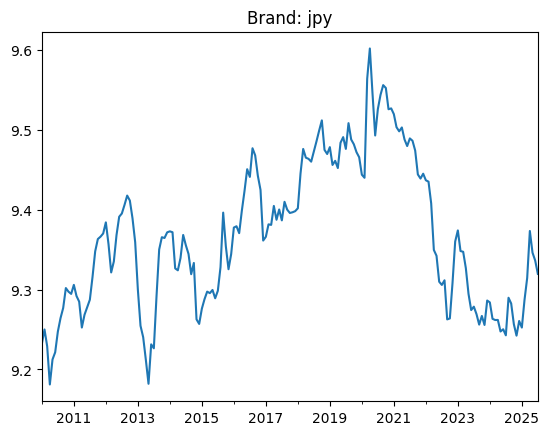

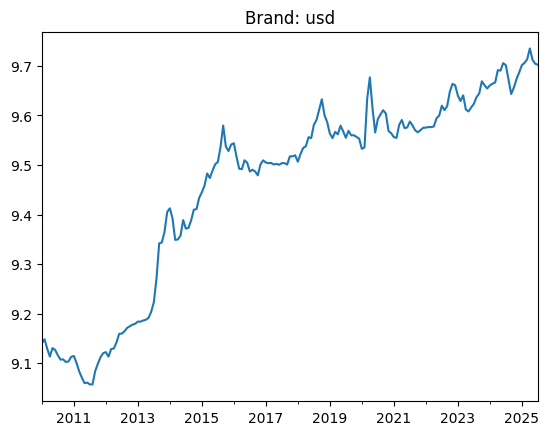

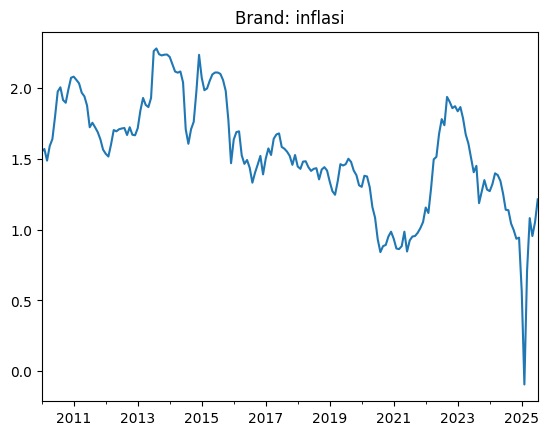

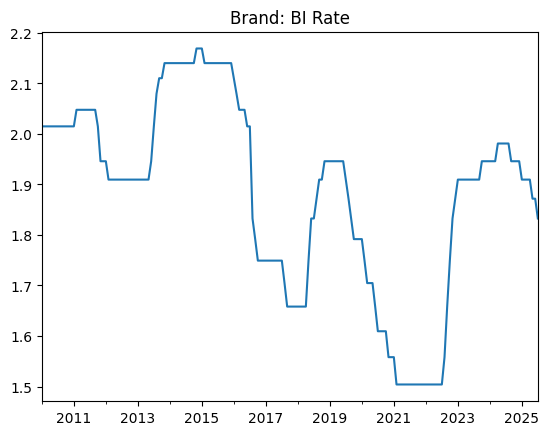

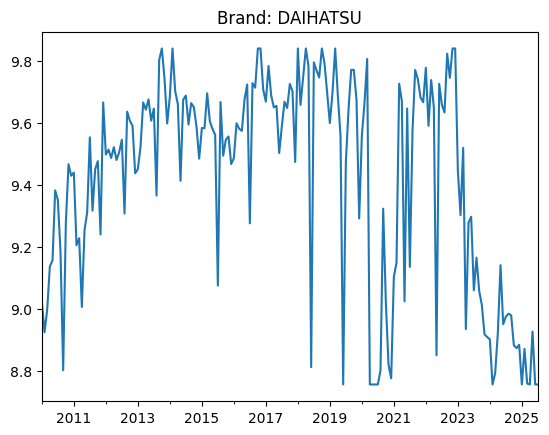

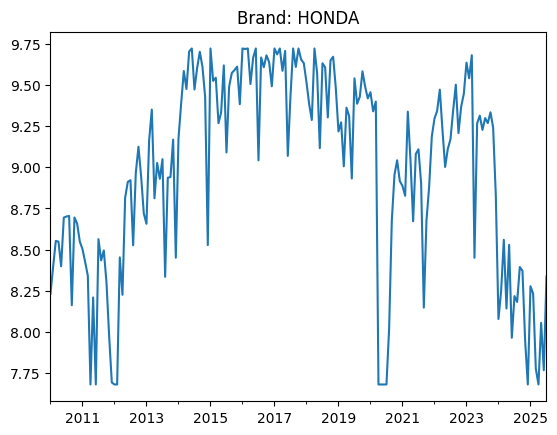

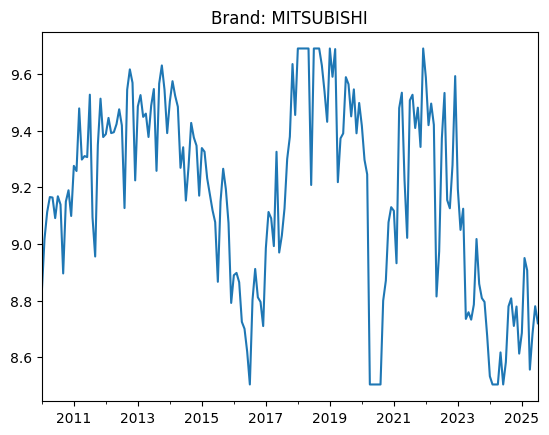

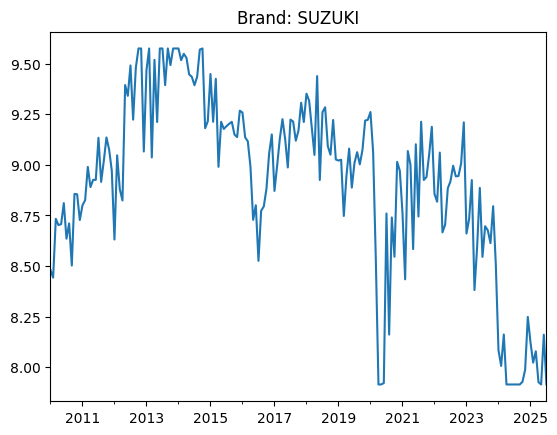

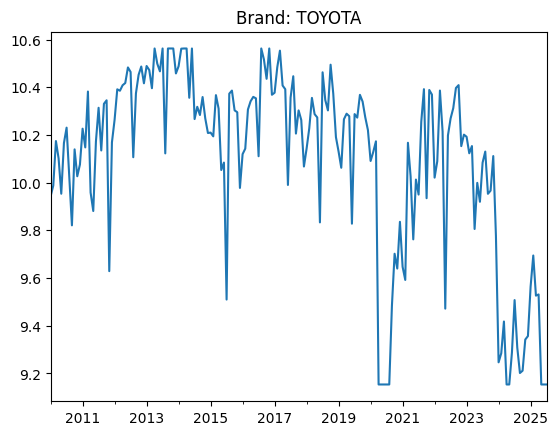

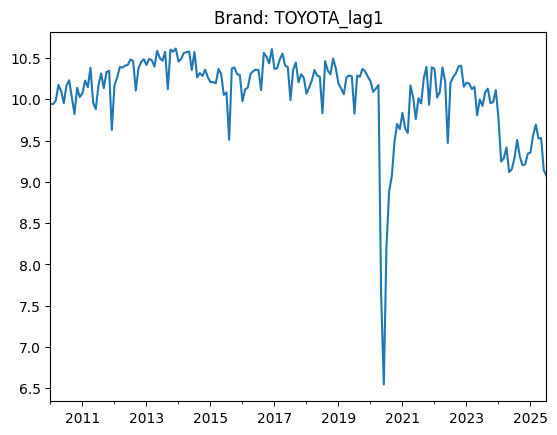

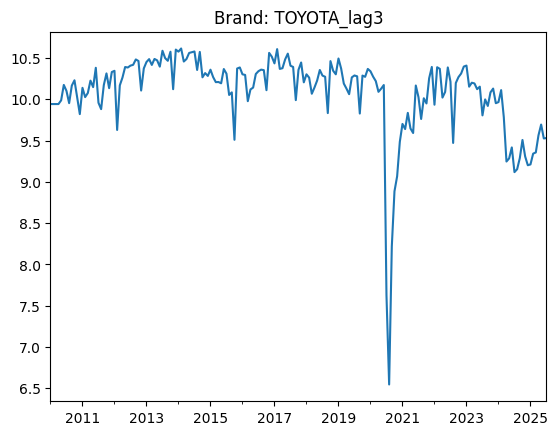

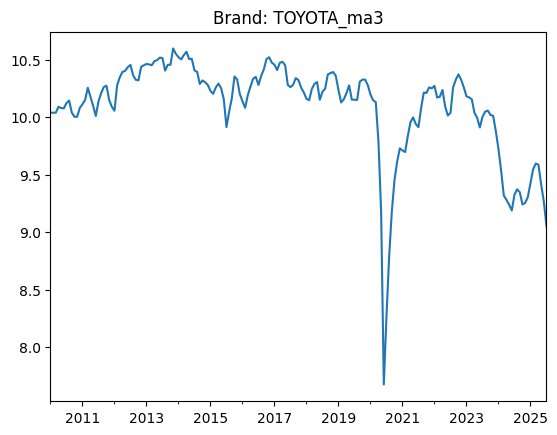

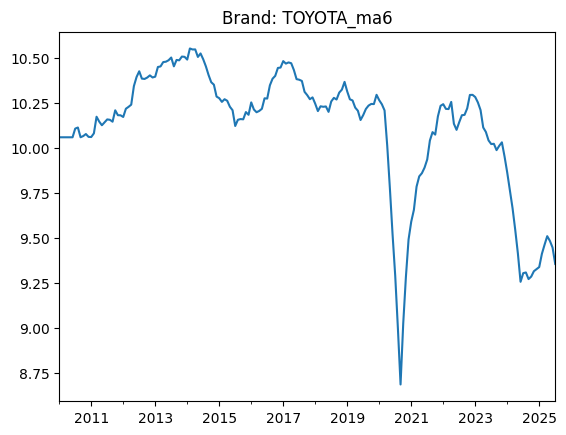

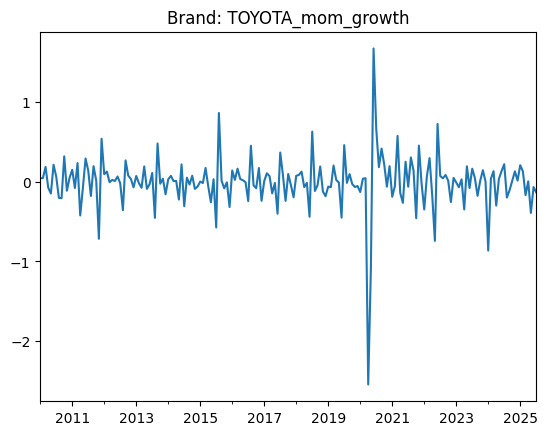

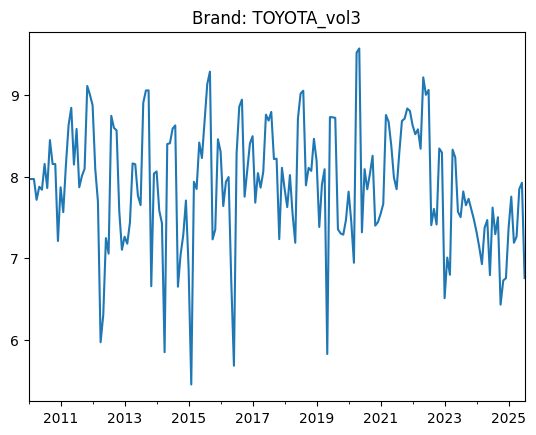

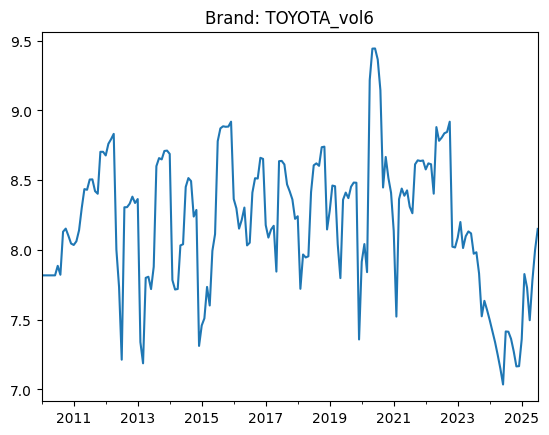

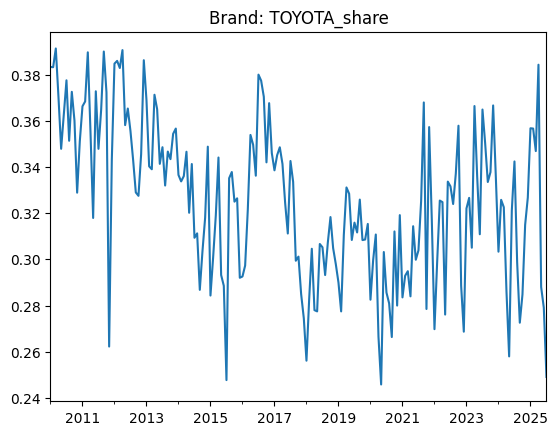

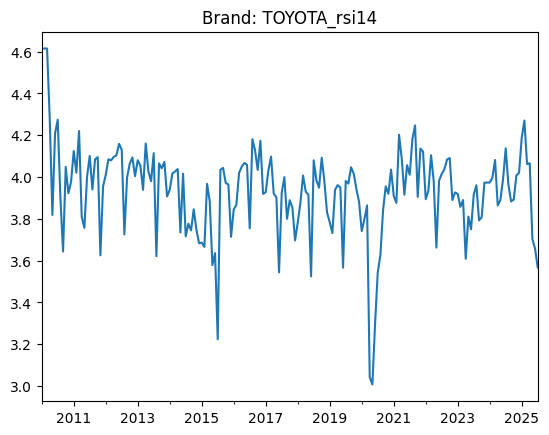

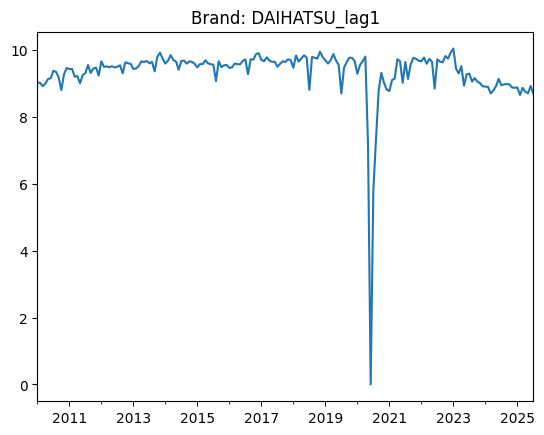

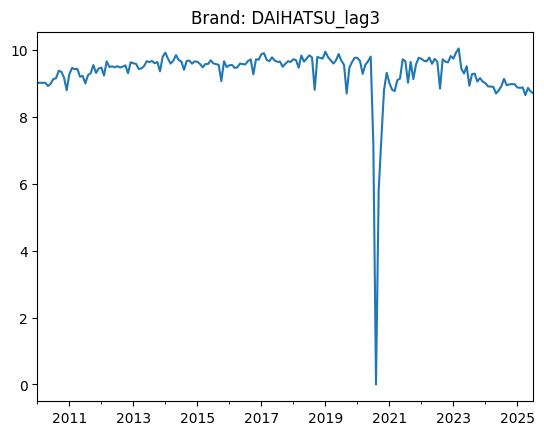

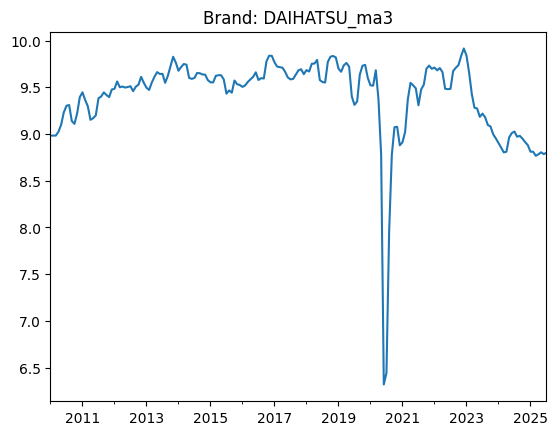

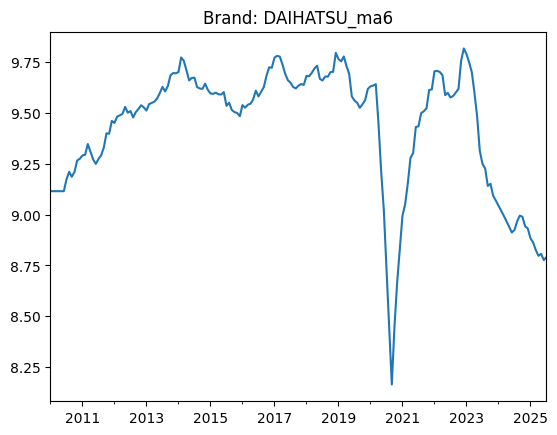

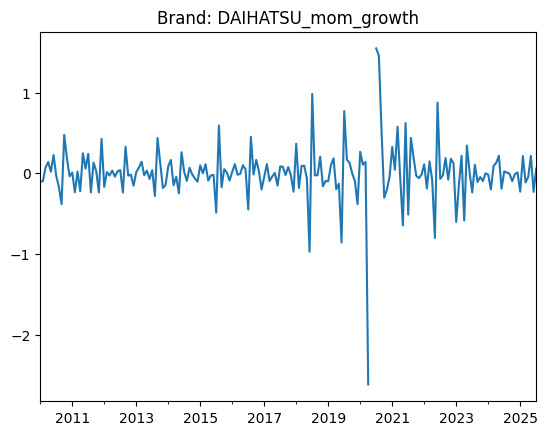

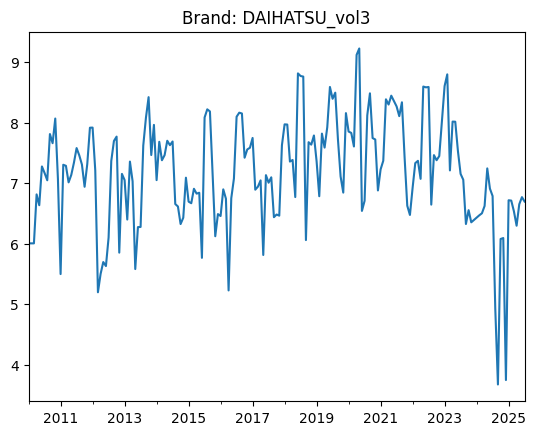

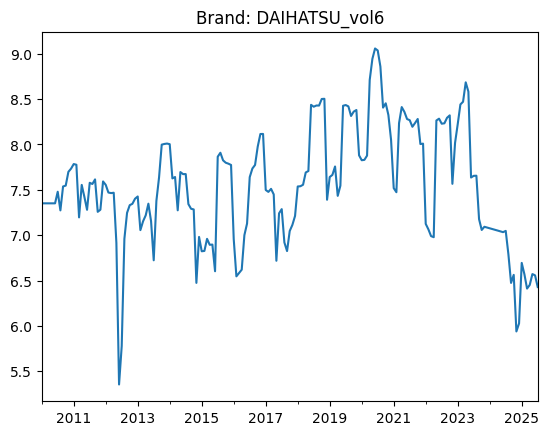

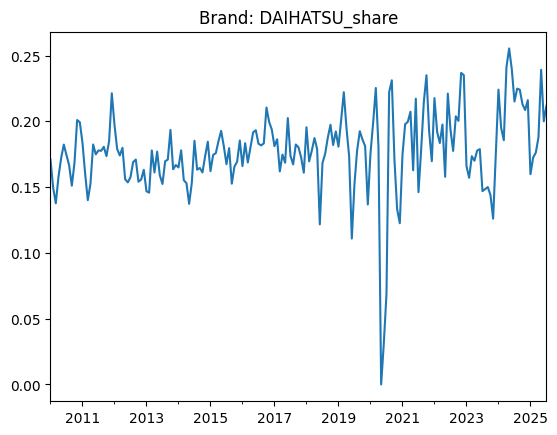

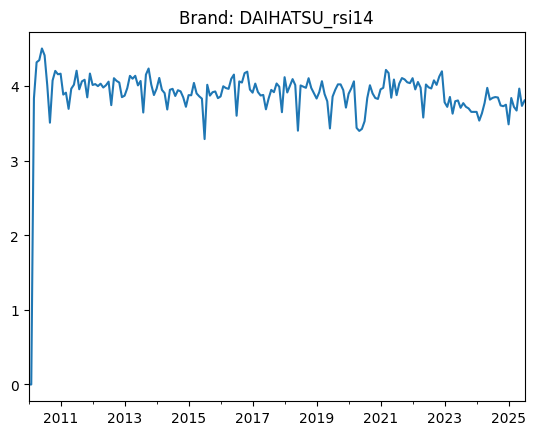

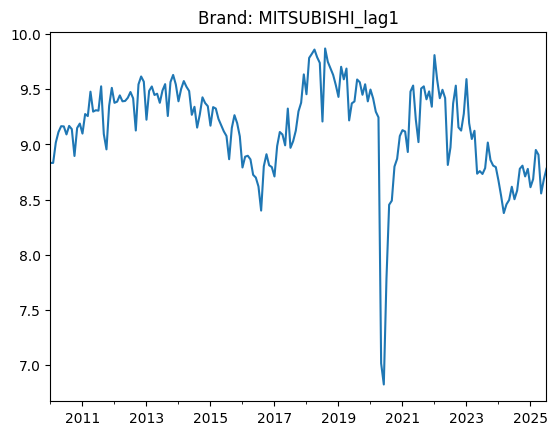

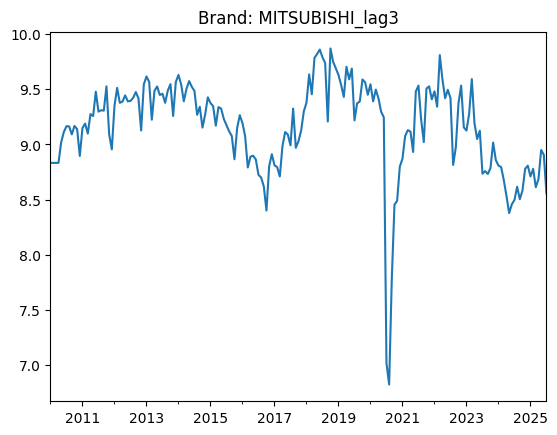

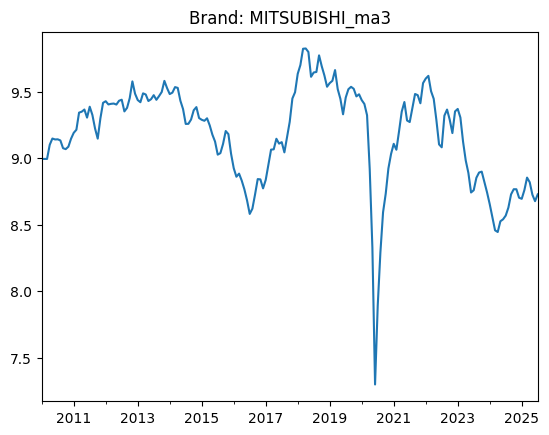

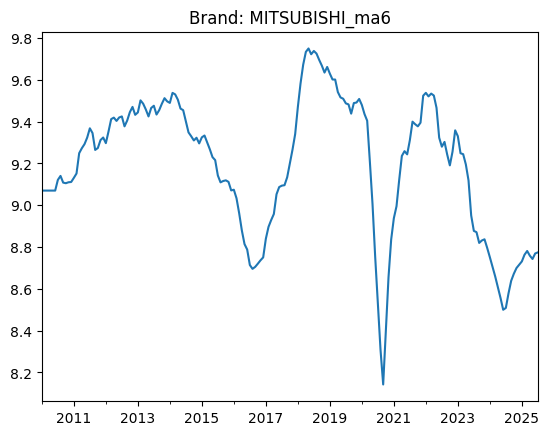

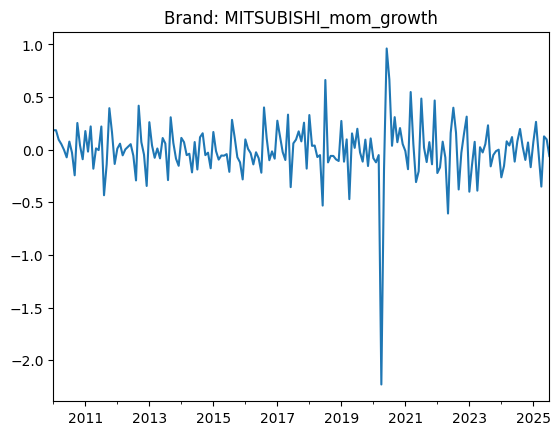

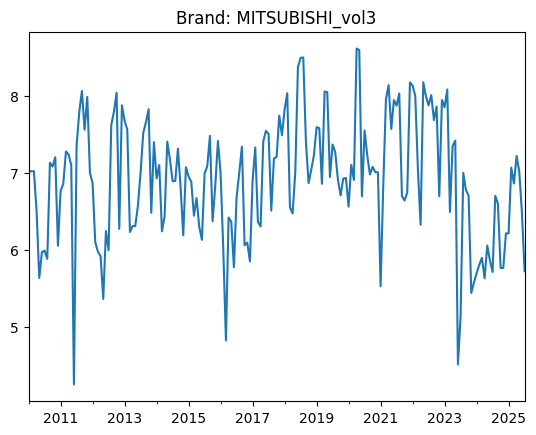

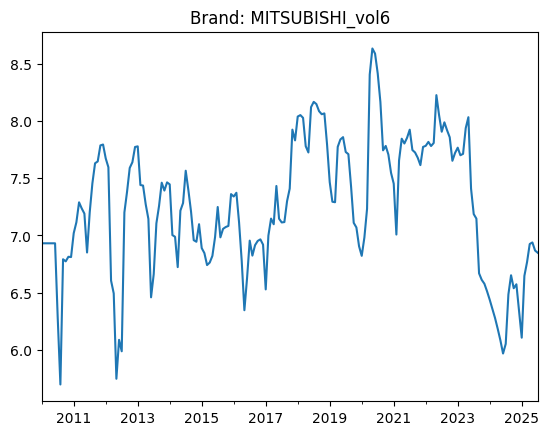

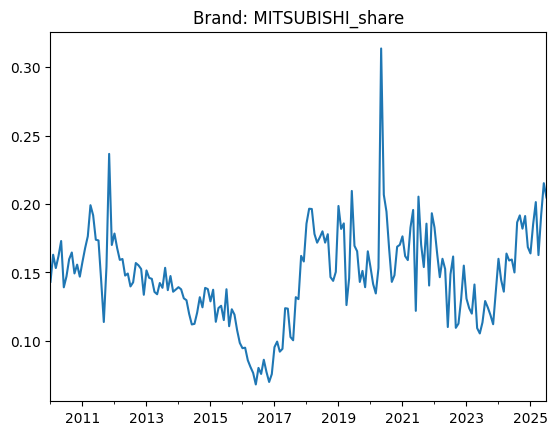

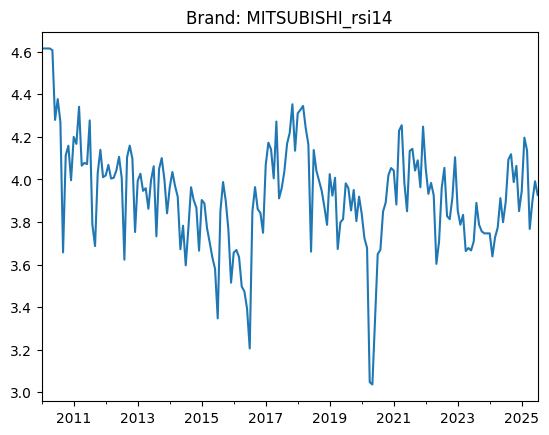

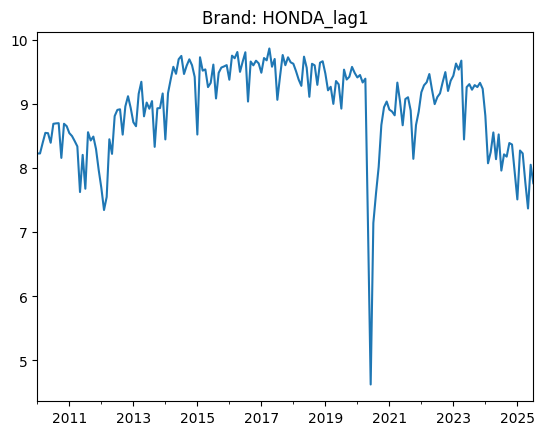

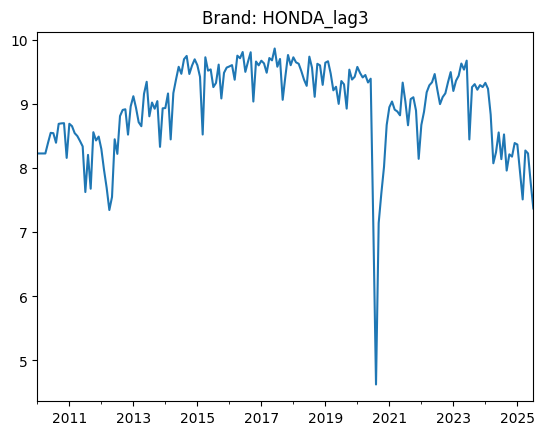

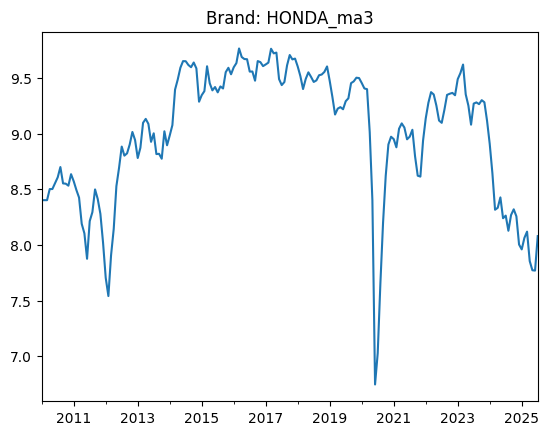

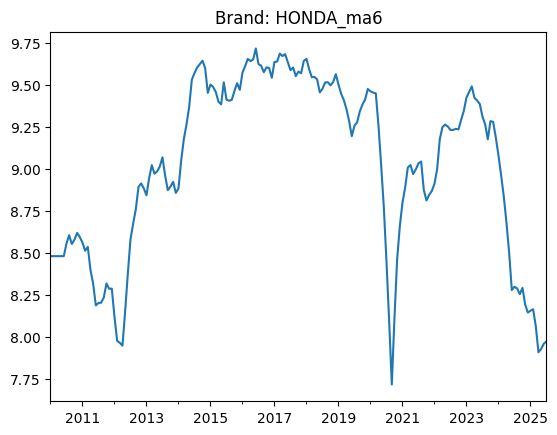

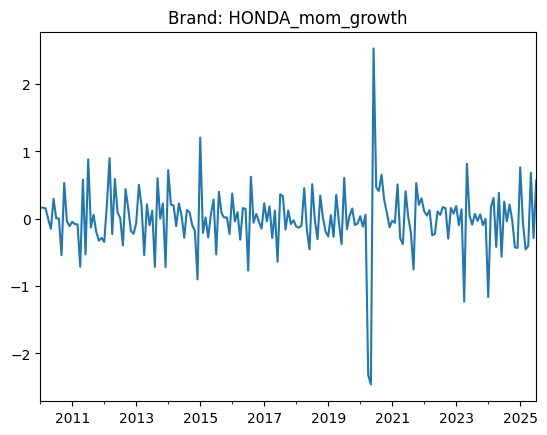

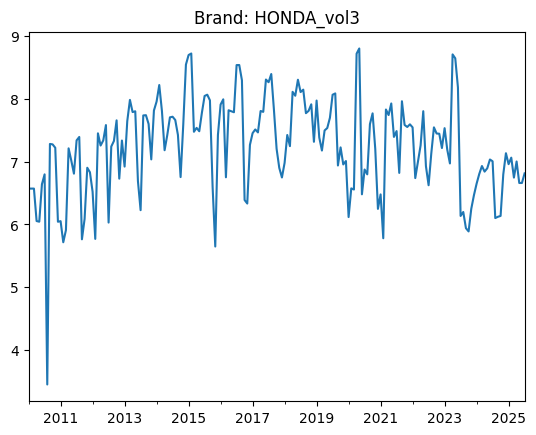

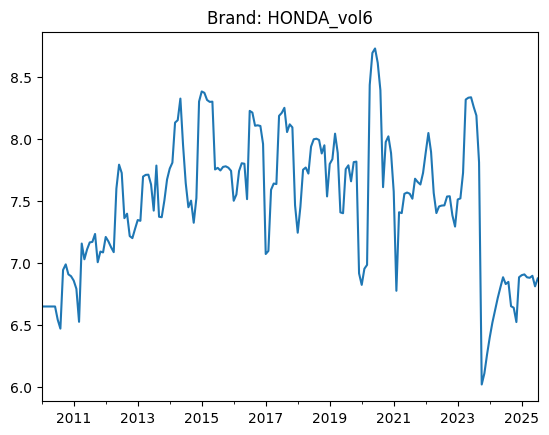

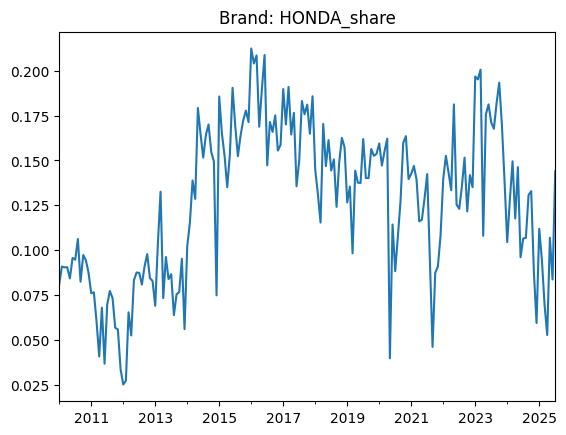

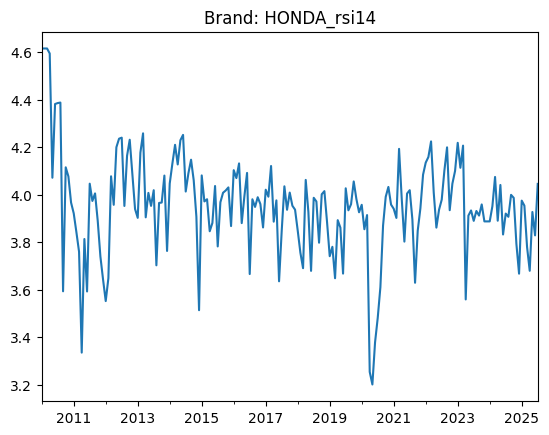

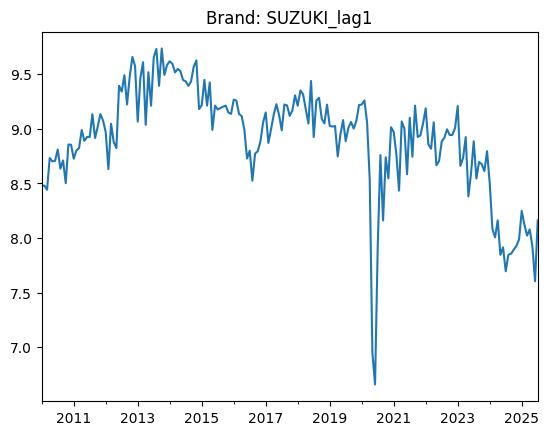

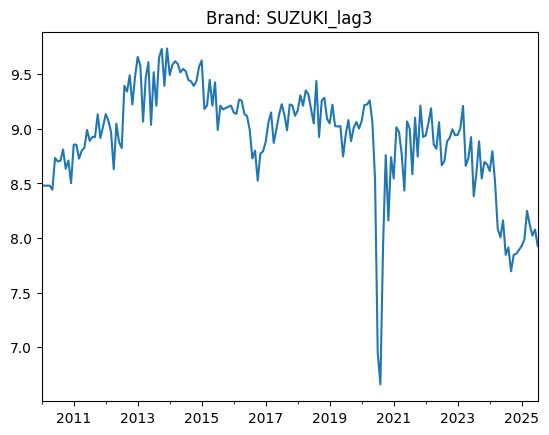

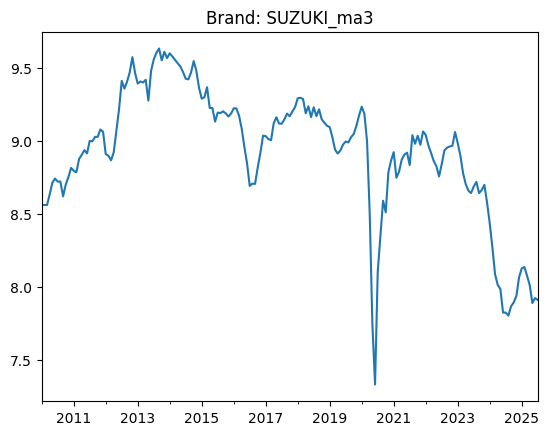

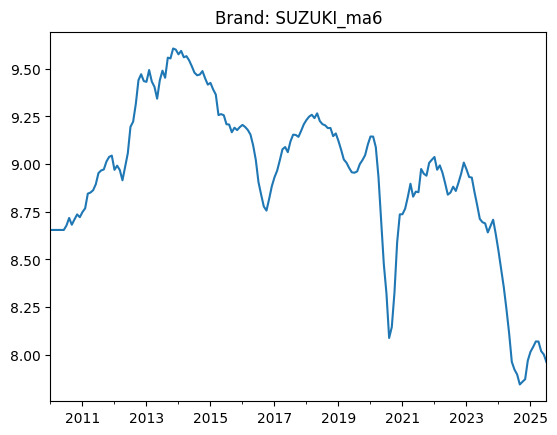

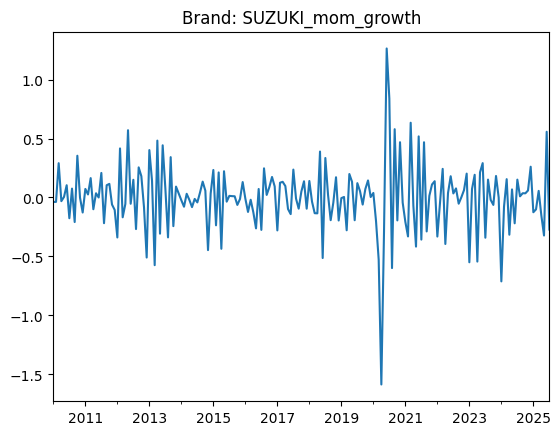

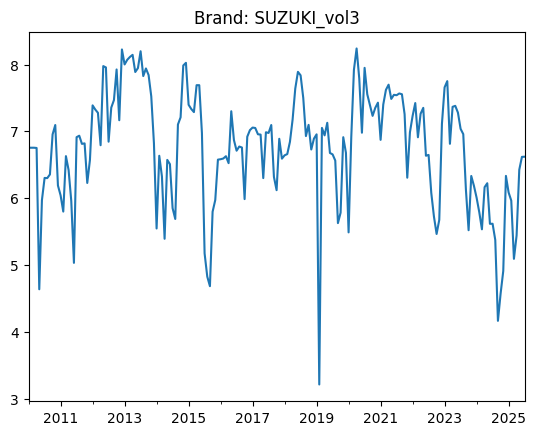

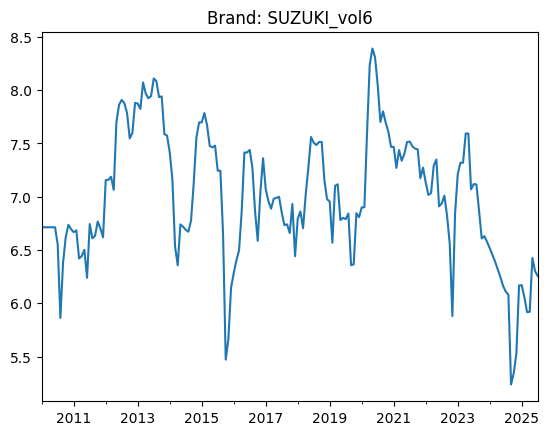

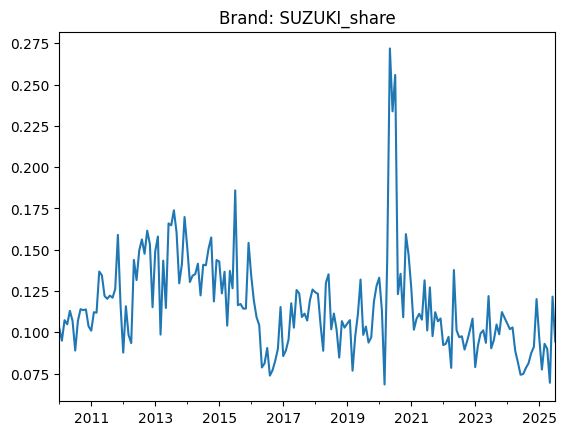

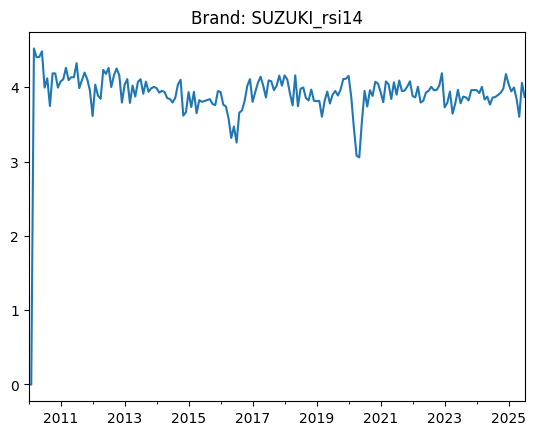

In [35]:

for brand, series in scaled_series.items():
  series.plot()
  plt.title(f"Brand: {brand}")
  plt.show()

#ARIMAX

In [36]:
from statsmodels.tsa.arima.model import ARIMA


In [37]:
# --- 8) df_combine untuk training (target log + exog bersih) ---
# gabungkan target log (kolom per brand) + exog (jika ada)
df_targets_log = pd.concat([scaled_series[b].rename(b) for b in brands], axis=1)
df_combine = pd.concat([df_targets_log, X], axis=1)


In [38]:
import numpy as np
import pandas as pd

def ensure_finite(df_in: pd.DataFrame, cols=None, time_interpolate=True) -> pd.DataFrame:
    """
    Pastikan kolom-kolom numerik, bebas NaN/Inf.
    Urutan: to_numeric -> replace Inf -> interpolate(time) -> ffill/bfill -> fill median/0.
    """
    df = df_in.copy()
    if cols is None:
        cols = df.columns

    # 1) paksa numerik
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

    # 2) Inf -> NaN
    df[cols] = df[cols].replace([np.inf, -np.inf], np.nan)

    # 3) Interpolasi time-aware (kalau index datetime)
    if time_interpolate and isinstance(df.index, pd.DatetimeIndex):
        df[cols] = df[cols].interpolate(method='time', limit_direction='both')

    # 4) ffill/bfill
    df[cols] = df[cols].ffill().bfill()

    # 5) fallback: median (jika masih ada NaN), atau 0 kalau seluruh kolom NaN
    for c in cols:
        if df[c].isna().any():
            med = df[c].median()
            df[c] = df[c].fillna(0.0 if np.isnan(med) else med)

    # 6) verifikasi keras
    if not np.isfinite(df[cols].to_numpy()).all():
        bad = []
        arr = df[cols]
        mask_inf = ~np.isfinite(arr)
        for c in cols:
            if mask_inf[c].any():
                bad.append(c)
        raise ValueError(f"Masih ada non-finite di kolom: {bad}")

    return df

# --- Sanitasi sebelum concat ---
# Pastikan df_targets_log & X punya index DatetimeIndex yang sama
df_targets_log = pd.concat([scaled_series[b].rename(b) for b in brands], axis=1)
df_targets_log = ensure_finite(df_targets_log, cols=brands, time_interpolate=True)

if exog:
    X = ensure_finite(X, cols=exog, time_interpolate=True)

# (opsional) pastikan urutan & irisan index sama persis
if exog:
    common_idx = df_targets_log.index.intersection(X.index)
    df_targets_log = df_targets_log.loc[common_idx]
    X = X.loc[common_idx]

# --- Baru gabungkan ---
df_combine = pd.concat([df_targets_log, X] if exog else [df_targets_log], axis=1)

# Double-check (defensif)
assert np.isfinite(df_combine.to_numpy()).all(), "df_combine masih mengandung NaN/Inf!"


In [39]:
df_combine.isna().sum()

DAIHATSU                 0
HONDA                    0
MITSUBISHI               0
SUZUKI                   0
TOYOTA                   0
jpy                      0
usd                      0
inflasi                  0
BI Rate                  0
TOYOTA_lag1              0
TOYOTA_lag3              0
TOYOTA_ma3               0
TOYOTA_ma6               0
TOYOTA_mom_growth        0
TOYOTA_vol3              0
TOYOTA_vol6              0
TOYOTA_share             0
TOYOTA_rsi14             0
DAIHATSU_lag1            0
DAIHATSU_lag3            0
DAIHATSU_ma3             0
DAIHATSU_ma6             0
DAIHATSU_mom_growth      0
DAIHATSU_vol3            0
DAIHATSU_vol6            0
DAIHATSU_share           0
DAIHATSU_rsi14           0
MITSUBISHI_lag1          0
MITSUBISHI_lag3          0
MITSUBISHI_ma3           0
MITSUBISHI_ma6           0
MITSUBISHI_mom_growth    0
MITSUBISHI_vol3          0
MITSUBISHI_vol6          0
MITSUBISHI_share         0
MITSUBISHI_rsi14         0
HONDA_lag1               0
H

<Figure size 1200x600 with 0 Axes>

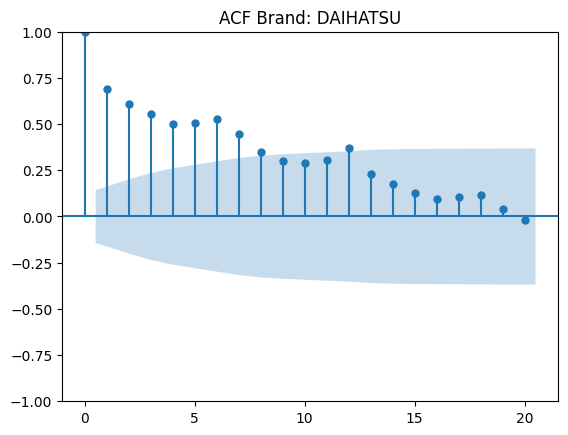

<Figure size 1200x600 with 0 Axes>

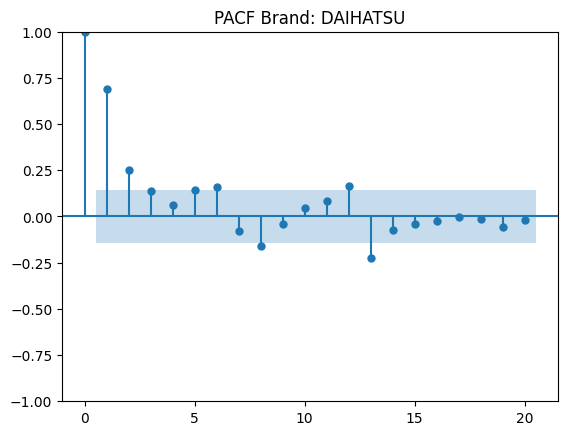

<Figure size 1200x600 with 0 Axes>

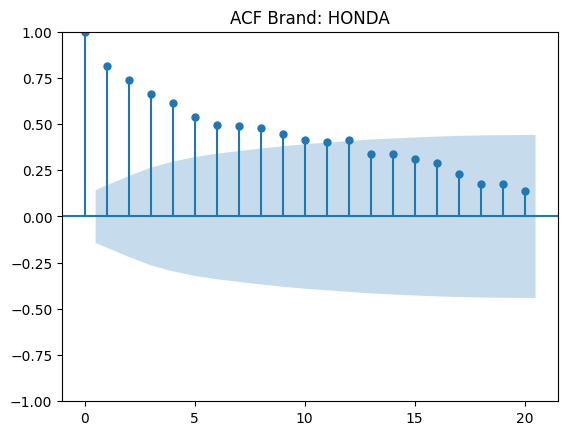

<Figure size 1200x600 with 0 Axes>

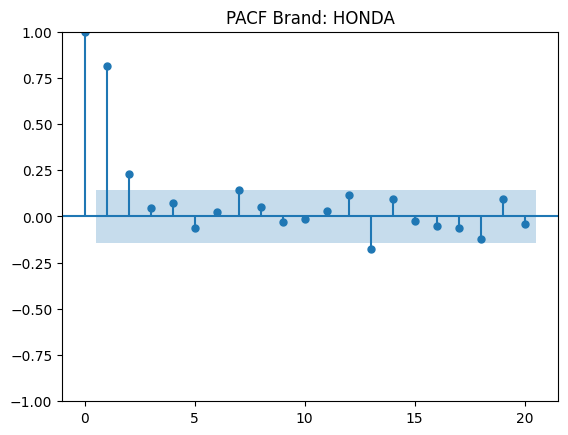

<Figure size 1200x600 with 0 Axes>

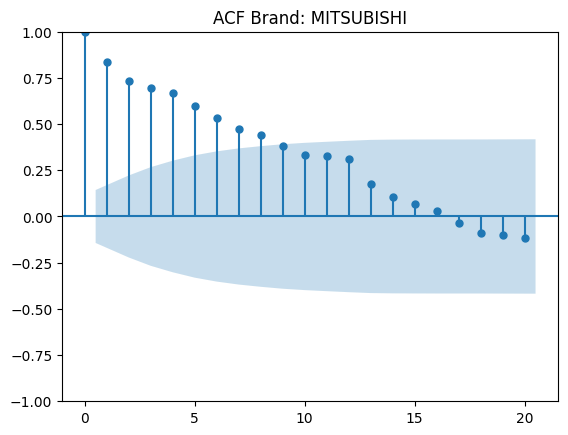

<Figure size 1200x600 with 0 Axes>

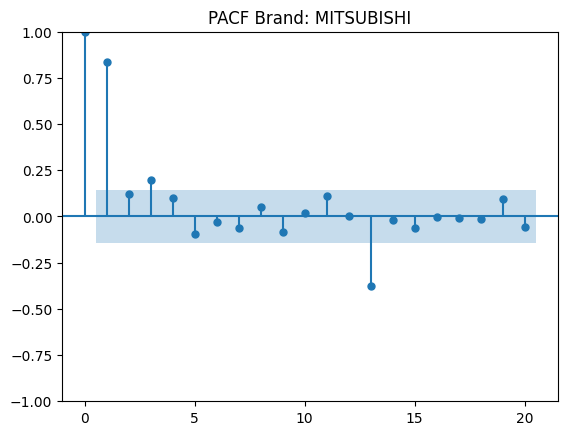

<Figure size 1200x600 with 0 Axes>

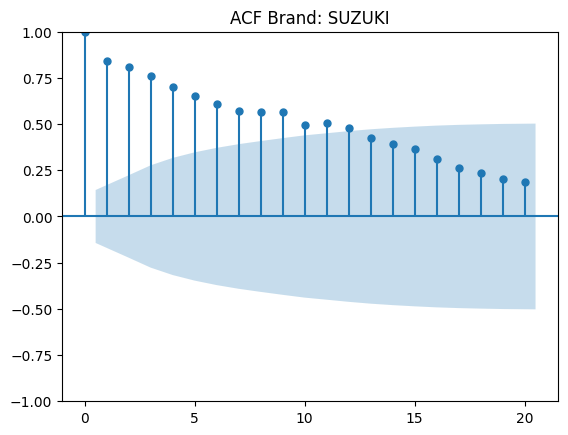

<Figure size 1200x600 with 0 Axes>

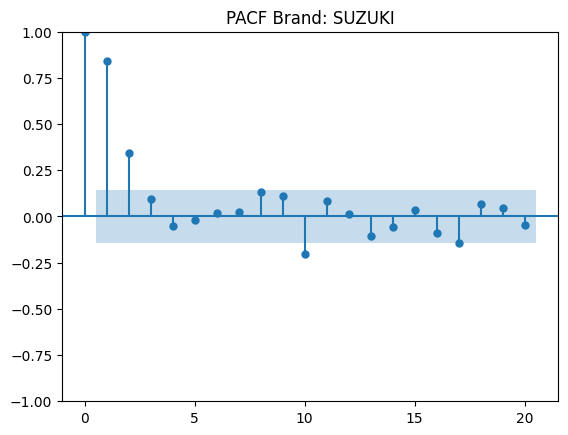

<Figure size 1200x600 with 0 Axes>

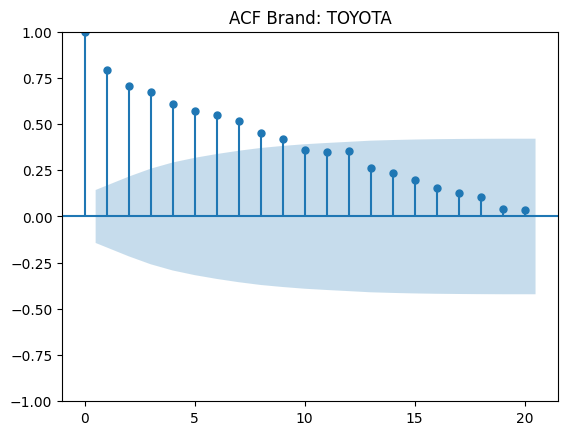

<Figure size 1200x600 with 0 Axes>

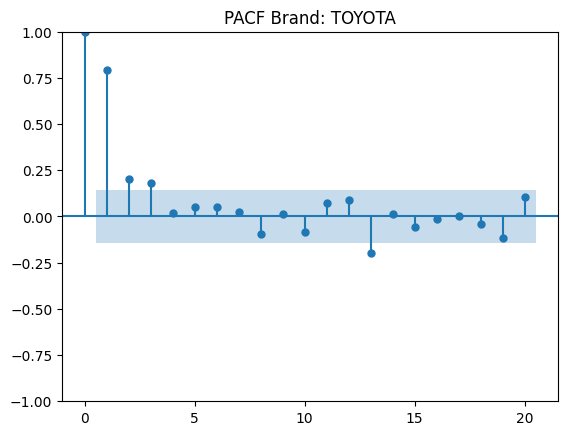

In [40]:
for brand in brands:
  s = scaled_series[brand]
  plt.figure(figsize=(12,6))
  plot_acf(s, lags=20)
  plt.title(f"ACF Brand: {brand}")
  plt.show()

  plt.figure(figsize=(12,6))
  plot_pacf(s, lags=20)
  plt.title(f"PACF Brand: {brand}")
  plt.show()

  pq = []
  pq.append([1,0])
  pq.append([1, 1])

In [41]:
import numpy as np
from darts import TimeSeries
from darts.metrics import smape as darts_smape

def smape_np(y_pred, y_true, eps=1e-12):
    """
    Hitung SMAPE dengan darts.metrics.smape.
    
    Parameters
    ----------
    y_pred : array-like, pd.Series, atau list
    y_true : array-like, pd.Series, atau list
    eps : float
        Nilai kecil untuk mencegah pembagian nol (tidak terlalu dipakai di darts).
    """
    # pastikan jadi pandas.Series agar TimeSeries.from_series bisa dipakai
    import pandas as pd
    if not isinstance(y_pred, pd.Series):
        y_pred = pd.Series(np.asarray(y_pred, dtype=float))
    if not isinstance(y_true, pd.Series):
        y_true = pd.Series(np.asarray(y_true, dtype=float))

    # pastikan panjang sama
    min_len = min(len(y_pred), len(y_true))
    y_pred = y_pred.iloc[:min_len]
    y_true = y_true.iloc[:min_len]

    ts_pred = TimeSeries.from_series(y_pred)
    ts_true = TimeSeries.from_series(y_true)

    return darts_smape(ts_true, ts_pred)


In [42]:
# # ===== Utils murni (top-level, aman untuk dipickle) =====
# def smape_np(y_pred, y_true, eps=1e-12):
#     import numpy as np
#     y_pred = np.asarray(y_pred, dtype=float)
#     y_true = np.asarray(y_true, dtype=float)
#     denom = (np.abs(y_true) + np.abs(y_pred)) + eps
#     return float(np.mean(2.0 * np.abs(y_pred - y_true) / denom))

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [44]:


def evaluate_pq_worker_flat(task, series_data_b, dmap_b, DMAP_B):
    """
    task: (series_name, p, q)
    series_data_b: broadcast -> dict[series] = {
        'train': (vals, idx),
        'test':  (vals, idx),           # optional (panjang)
        'orig_test': (vals, idx),
        'Xtr': (vals, cols, idx),
        'Xte': (vals, cols, idx)
    }
    dmap_b: broadcast -> dict[series] = d
    Return:
      (series, (smape, p, q, forecast_list, index_list))   atau None jika gagal/invalid
    """
    series, p, q = task
    import warnings
    import numpy as np
    import pandas as pd
    from statsmodels.tsa.arima.model import ARIMA

    try:
        pack = series_data_b.value[series]
        d = int(dmap_b.value[series])
        D = int(DMAP_B.value[series])
        train_vals, train_idx = pack['train']
        orig_vals,  orig_idx  = pack['orig_test']
        Xtr_vals, Xtr_cols, Xtr_idx = pack['Xtr']
        Xte_vals, Xte_cols, Xte_idx = pack['Xte']

        train_s = pd.Series(train_vals, index=pd.Index(train_idx, name="date"))
        original_test_s = pd.Series(orig_vals, index=pd.Index(orig_idx, name="date"))
        exog_train_df = pd.DataFrame(Xtr_vals, index=pd.Index(Xtr_idx, name="date"), columns=Xtr_cols)
        exog_test_df  = pd.DataFrame(Xte_vals, index=pd.Index(Xte_idx, name="date"), columns=Xte_cols)

        warnings.filterwarnings("ignore")
        model = SARIMAX(
            train_s, 
            exog=exog_train_df, 
            order=(int(p), d, int(q)),
            seasonal_order=(int(p), D, int(d), 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)
        fr = model_fit.forecast(steps=len(original_test_s), exog=exog_test_df)
        fr_inv = np.expm1(fr.values)
        # print(fr_inv)
        acc = smape_np(fr_inv, original_test_s.values)
        # print(series, acc, int(p), int(q))
        print(f"[{series}] smape({acc}, p({int(p)}), d({int(d)}), q({int(q)})")
        if acc > 0.7:
            return (series, (float(acc), int(p), int(q),
                             fr_inv.tolist(),
                             original_test_s.index.values.tolist()))
        else:
            return None
    except Exception:
        return None


In [45]:
# ===== Driver function: siapkan paket per-series & jalankan paralel 1-layer =====
def arimax_spark_flat(series_list, df, df_combine, exog, differencing_steps,
                      max_p=5, max_q=5, test_length=6, sc=None):
    """
    - df, df_combine: pandas DataFrame (bila Anda punya Spark DF, toPandas() di DRIVER lebih dulu).
    - Tidak ada pemanggilan Spark di worker selain baca broadcast.
    - Paralelisme hanya satu lapis: flatten (series, p, q).
    """
    import numpy as np
    import pandas as pd

    # Jika yang masuk Spark DF, ubah ke pandas di DRIVER:
    try:
        import pyspark.sql as _ps
        if isinstance(df_combine, _ps.dataframe.DataFrame):
            df_combine = df_combine.toPandas()
        if isinstance(df, _ps.dataframe.DataFrame):
            df = df.toPandas()
    except Exception:
        pass

    # 1) Pack data per-series (DRIVER)
    def pack_series(s):
        return (np.asarray(s.values), np.asarray(s.index.values))

    def pack_frame(X):
        return (np.asarray(X.values), list(X.columns), np.asarray(X.index.values))

    series_data = {}
    dmap = {}
    DMAP = {}
    for s in series_list:
        d = int(differencing_steps[s])
        D = int(seasonal_steps[s])
        dmap[s] = d
        DMAP[s] = D

        train = df_combine[s].iloc[:-test_length]
        orig_test = df[s].iloc[-test_length:]
        Xtr = df_combine[exog].iloc[:-test_length]
        Xte = df_combine[exog].iloc[-test_length:]

        series_data[s] = {
            'train': pack_series(train),
            'orig_test': pack_series(orig_test),
            'Xtr': pack_frame(Xtr),
            'Xte': pack_frame(Xte)
        }

    # 2) Broadcast paket (DRIVER)
    b_series_data = sc.broadcast(series_data)
    b_dmap = sc.broadcast(dmap)
    b_DMAP = sc.broadcast(DMAP)

    # 3) Bentuk tugas flatten: (series, p, q)
    grid = [(p, q) for p in range(max_p + 1) for q in range(max_q + 1)]
    tasks = [(s, p, q) for s in series_list for (p, q) in grid]

    # 4) Paralel: evaluasi tiap (series,p,q) di worker (tanpa nested Spark)
    rdd = sc.parallelize(tasks)
    evaluated = (
        rdd.map(lambda task: evaluate_pq_worker_flat(task, b_series_data, b_dmap, b_DMAP))
           .filter(lambda x: x is not None)
    )

    # 5) Reduce per-series: pilih SMAPE terendah
    def pick_better(a, b):
        # a, b: (smape, p, q, forecast_list, index_list)
        return a if a[0] <= b[0] else b

    best_per_series = (
        evaluated
        .map(lambda x: (x[0], x[1]))  # (series, candidate_tuple)
        .reduceByKey(pick_better)
        .collect()
    )

    # 6) Susun output dict {series: {...}}
    out = {}
    for s, (best_smape, best_p, best_q, fr_list, idx_list) in best_per_series:
        idx = pd.Index(idx_list, name="date")
        fr_ser = pd.Series(fr_list, index=idx)
        actual = df[s].iloc[-len(idx_list):]
        out[s] = {
            "smape": float(best_smape),
            "p": int(best_p),
            "q": int(best_q),
            "d": int(dmap[s]),
            "forecast": fr_ser,
            "actual": actual
        }

    # 7) Fallback untuk series yang tidak punya kandidat valid
    missing = set(series_list) - set(out.keys())
    if missing:
        from statsmodels.tsa.arima.model import ARIMA
        for s in missing:
            d = dmap[s]
            train = df_combine[s].iloc[:-test_length]
            orig_test = df[s].iloc[-test_length:]
            Xtr = df_combine[exog].iloc[:-test_length]
            Xte = df_combine[exog].iloc[-test_length:]
            model = SARIMAX(train, exog=Xtr, order=(0, d, 0), seasonal_order=(0, D, 0, 12),enforce_stationarity=False,enforce_invertibility=False).fit(disp=False)
            fr = model.forecast(steps=test_length, exog=Xte)
            fr_inv = np.expm1(fr.values)
            acc = smape_np(fr_inv, orig_test.values)
            out[s] = {
                "smape": acc,
                "p": 0, "q": 0, "d": d,
                "forecast": pd.Series(fr_inv, index=orig_test.index),
                "actual": orig_test
            }
    return out


In [46]:
# Pastikan sc = spark.sparkContext
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SARIMAX").getOrCreate()
sc = spark.sparkContext
best = arimax_spark_flat(
    series_list=brands,               # list nama kolom target
    df=df, df_combine=df_combine,     # pandas DataFrame
    exog=exog,                        # list nama kolom exogenous
    differencing_steps=differencing_steps,
    max_p=5, max_q=5, test_length=6,
    sc=sc
)


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/06 11:25:49 WARN Utils: Your hostname, mukhtada, resolves to a loopback address: 127.0.1.1; using 192.168.1.142 instead (on interface wlp8s0)
25/09/06 11:25:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/06 11:25:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
[HONDA] smape(12.683668370708437, p(1), d(0), q(2)                (0 + 16) / 16]
[MITSUBISHI] smape(5.038395490824836, p(0), d(1), q(5)
[MITSUBISHI] smape(4.531994267574853, p(1), d(1), q(0)
[HONDA] smape(12.61024762047799, p(1), d(0), q(3)
[SUZUKI] smape(9.36037899082261, p(0), d(1), q(2)
[TOYOTA] smape(7.281725857987784, p(1)

In [55]:
# import matplotlib.pyplot as plt
smape_mean = 0
for b in best:
    print(f"[{b}] {best[b]['smape']:.4f}, p({best[b]['p']}) d({best[b]['d']})  q({best[b]['q']})")
    smape_mean += best[b]['smape']
print("Overall: ",smape_mean/5)
#     plt.figure(figsize=(8, 4))
#     best[b]["actual"].plot(label="Actual")
#     best[b]["forecast"].plot(label="Forecast")
    
#     plt.title(f"Forecast vs Actual - {b}")
#     plt.legend()
#     plt.show()


[SUZUKI] 9.3004, p(0) d(1)  q(4)
[DAIHATSU] 5.6055, p(2) d(1)  q(0)
[TOYOTA] 7.0632, p(1) d(1)  q(5)
[HONDA] 10.0390, p(4) d(0)  q(4)
[MITSUBISHI] 4.1110, p(0) d(1)  q(3)
Overall:  7.223844056972604


In [48]:
combined_fr = {}
for brand in brands:
    # Ambil forecast & actual
    fc = best[brand]['forecast'].rename("forecast")
    ac = best[brand]['actual'].rename("actual")

    # Pastikan dua-duanya DatetimeIndex
    if np.issubdtype(fc.index.dtype, np.integer):
        fc.index = pd.to_datetime(fc.index, unit="ns")
    if not isinstance(ac.index, pd.DatetimeIndex):
        ac.index = pd.to_datetime(ac.index)

    # (opsional) pastikan frekuensi align
    fc = fc.sort_index()
    ac = ac.sort_index()

    # Gabung jadi DataFrame
    combined_fr[brand] = pd.concat([fc, ac], axis=1)


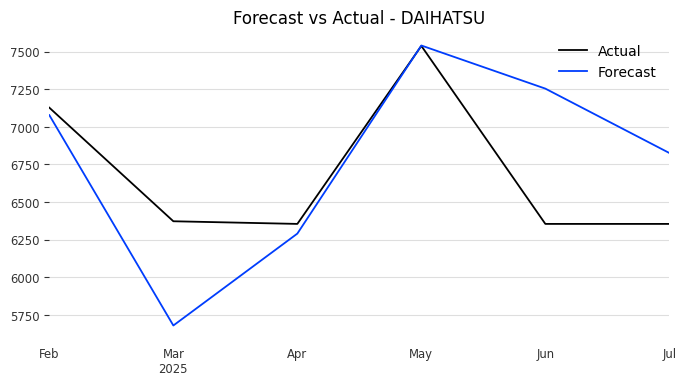

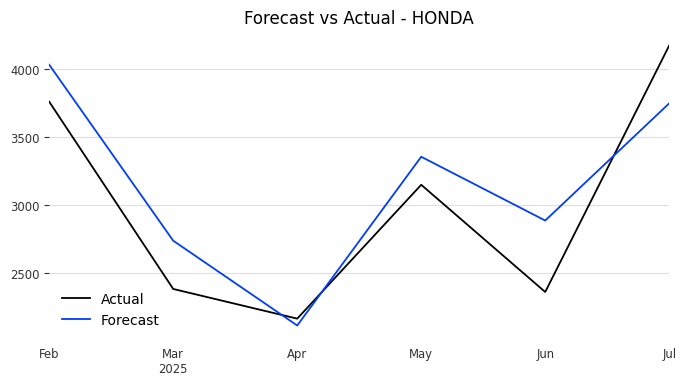

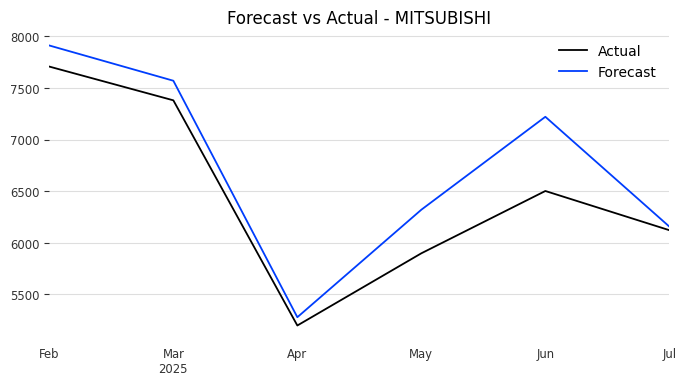

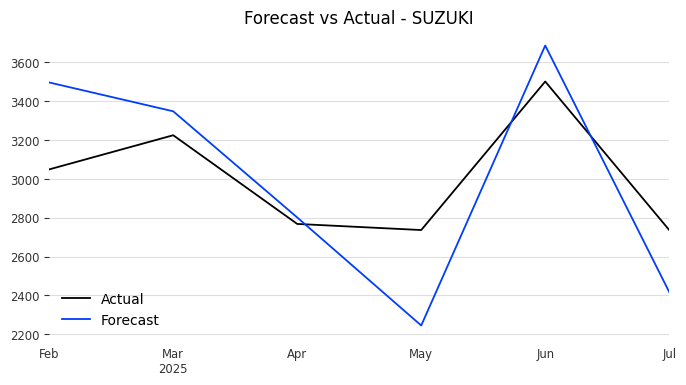

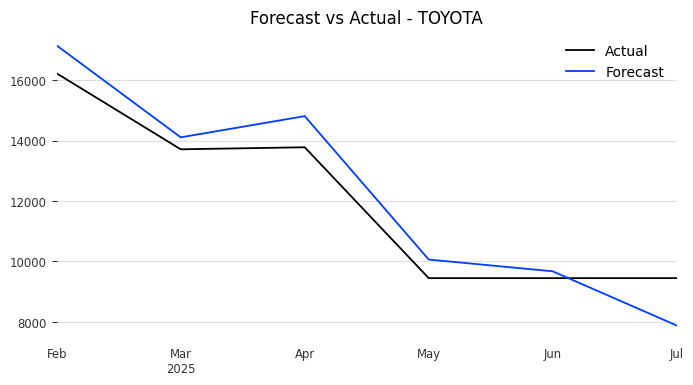

In [49]:
for b in combined_fr:
    plt.figure(figsize=(8, 4))
    combined_fr[b]["actual"].plot(label="Actual")
    combined_fr[b]["forecast"].plot(label="Forecast")
    
    plt.title(f"Forecast vs Actual - {b}")
    plt.legend()
    plt.show()


In [50]:
import pandas as pd
from darts import TimeSeries
from darts.metrics import smape

def smape_darts(df, col_forecast="forecast", col_actual="actual"):
    """
    Hitung SMAPE dengan darts.metrics.smape.
    DataFrame harus punya dua kolom: forecast & actual.
    Index dianggap sebagai time index.
    """
    ts_forecast = TimeSeries.from_series(df[col_forecast])
    ts_actual   = TimeSeries.from_series(df[col_actual])
    return smape(ts_actual, ts_forecast)


In [51]:
for brand in brands:
    # print(smape_df(combined_fr))
    display(combined_fr[brand])

,forecast,actual
2025-02-01,7077.034799,7126.837
2025-03-01,5678.651840,6371.692
2025-04-01,6289.701318,6354.101
2025-05-01,7540.286209,7537.632
2025-06-01,7253.616687,6354.101
2025-07-01,6825.570865,6354.101


,forecast,actual
2025-02-01,4029.550071,3758.004
2025-03-01,2737.357026,2382.924
2025-04-01,2114.650013,2165.000
2025-05-01,3353.918071,3148.000
2025-06-01,2885.512720,2360.797
2025-07-01,3746.404409,4171.007


,forecast,actual
2025-02-01,7911.527544,7707.092
2025-03-01,7569.944116,7380.000
2025-04-01,5277.401521,5197.000
2025-05-01,6319.540104,5897.000
2025-06-01,7220.412990,6501.000
2025-07-01,6155.903124,6121.000


,forecast,actual
2025-02-01,3494.406302,3047.704
2025-03-01,3346.230797,3223.220
2025-04-01,2800.674813,2767.379
2025-05-01,2245.417842,2736.000
2025-06-01,3684.391266,3499.336
2025-07-01,2417.585199,2736.000


,forecast,actual
2025-02-01,17148.930877,16225.180
2025-03-01,14108.153068,13711.773
2025-04-01,14809.920934,13779.300
2025-05-01,10061.588087,9445.956
2025-06-01,9671.955854,9445.956
2025-07-01,7877.468259,9445.956


In [59]:
def safe_expm1(arr, lo=-50, hi=50):
    """
    Clamp prediksi log sebelum expm1 supaya tidak overflow.
    lo, hi: batas bawah/atas log.
    """
    arr = np.asarray(arr, dtype=float)
    arr = np.clip(arr, lo, hi)
    return np.expm1(arr)


In [56]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmse(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    return np.sqrt(mean_squared_error(y_true, y_pred))

def make_rolling_splits(y_index, n_folds=4, test_length=6, min_train=36):
    """
    Menghasilkan list tuple (train_slice, test_slice) berbasis indeks (posisi),
    dengan jendela training expanding dan test_length tetap.
    """
    n = len(y_index)
    folds = []
    # posisi awal train set
    start_train = 0
    # posisi awal test pertama
    start_test = max(min_train, n - (n_folds * test_length))
    # safety
    start_test = max(start_test, min_train)
    while start_test + test_length <= n:
        folds.append((slice(start_train, start_test), slice(start_test, start_test + test_length)))
        start_test += test_length
    return folds


In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def backtest_sarimax_single(
    y,                   # pd.Series target dalam SKALA TRAINING (mis. log1p jika dipakai)
    X=None,              # pd.DataFrame exogenous (optional), index aligned dgn y
    order=(1,0,1),
    seasonal_order=(0,0,0,0),
    test_length=6,
    n_folds=4,
    inverse_transform=None,  # function untuk inverse transform (mis. np.expm1), atau None
    verbose=False
):
    """
    Rolling-origin CV untuk satu series.
    Return: dict dengan metrik agregat & per-fold detail.
    """
    y = y.dropna()
    if X is not None:
        X = X.loc[y.index]

    folds = make_rolling_splits(y.index, n_folds=n_folds, test_length=test_length, min_train=max(24, test_length*2))
    results = []
    all_true, all_pred = [], []

    for i, (tr_sl, te_sl) in enumerate(folds, 1):
        y_tr, y_te = y.iloc[tr_sl], y.iloc[te_sl]
        X_tr = X.iloc[tr_sl] if X is not None else None
        X_te = X.iloc[te_sl] if X is not None else None

        try:
            model = SARIMAX(
                endog=y_tr, exog=X_tr,
                order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False
            )
            fit = model.fit(disp=False)
            y_hat = fit.forecast(steps=len(y_te), exog=X_te)
        except Exception as e:
            if verbose:
                print(f"[Fold {i}] gagal fit/forecast: {e}")
            # fallback: prediksi naive terakhir
            y_hat = pd.Series([y_tr.iloc[-1]] * len(y_te), index=y_te.index)

        # inverse transform jika perlu (mis. dari log1p ke level)
        if inverse_transform is not None:
            y_hat_level = pd.Series(inverse_fn(y_hat.values), index=y_hat.index)
            y_te_level  = pd.Series(y_te.values, index=y_te.index)  # <-- df[s], bukan log
        else:
            y_hat_level = y_hat
            y_te_level = y_te

        # metrik
        fold_smape = smape_np(y_hat_level, y_te_level)
        fold_rmse  = rmse(y_te_level, y_hat_level)
        fold_mae   = mean_absolute_error(y_te_level, y_hat_level)

        results.append({
            "fold": i,
            "start": y_te.index[0],
            "end": y_te.index[-1],
            "smape": fold_smape,
            "rmse": fold_rmse,
            "mae": fold_mae
        })
        all_true.append(y_te_level)
        all_pred.append(y_hat_level)
        if verbose:
            print(f"[Fold {i}] SMAPE={fold_smape:.3f} RMSE={fold_rmse:.3f} MAE={fold_mae:.3f}")

    # gabung semua fold untuk metrik agregat
    y_true_all = pd.concat(all_true).sort_index()
    y_pred_all = pd.concat(all_pred).sort_index()
    agg = {
        "smape": smape_np(y_pred_all, y_true_all),
        "rmse": rmse(y_true_all, y_pred_all),
        "mae": mean_absolute_error(y_true_all, y_pred_all),
    }

    return {
        "agg": agg,
        "per_fold": pd.DataFrame(results),
        "y_true_all": y_true_all,
        "y_pred_all": y_pred_all
    }


In [62]:
# contoh: pakai p,q terbaik dari hasil Spark-mu
# best[s] = {"p": ..., "q": ..., "d": ..., "smape": ..., "forecast": ..., "actual": ...}
backtest_summary = {}
TRAIN_ON_LOG1P = True
inverse_fn = safe_expm1 if TRAIN_ON_LOG1P else None


for s in brands:
    p = int(best.get(s, {}).get("p", 1))
    q = int(best.get(s, {}).get("q", 1))
    d = int(differencing_steps[s])
    D = int(seasonal_steps[s])

    # NOTE: seasonal_order=(P,D,Q,12). Jika mau sederhana, samakan P=p, Q=q.
    order = (p, d, q)
    seasonal_order = (p, D, q, 12)

    y_train_scale = df_combine[s].dropna()         # skala training (log1p jika dipakai)
    X_all = df_combine[exog] if len(exog) else None

    bt = backtest_sarimax_single(
        y=df_combine[s].dropna(),              # log1p(y) untuk training
        X=df_combine[exog] if len(exog) else None,
        order=(p, d, q),
        seasonal_order=(p, D, q, 12),
        test_length=6,
        n_folds=4,
        inverse_transform=inverse_fn,   # pakai safe_expm1
        verbose=False
    )

    backtest_summary[s] = bt



/opt/venvs/global-python/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/venvs/global-python/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/venvs/global-python/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/venvs/global-python/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/venvs/global-python/lib/python3.12/site-packages/st

DAIHATSU | SMAPE=199.514 RMSE=7696.085 MAE=7578.951
HONDA | SMAPE=200.000 RMSE=4098869616900596826112.000 MAE=3240440955366920421376.000
MITSUBISHI | SMAPE=199.434 RMSE=6309.487 MAE=6246.298
SUZUKI | SMAPE=200.000 RMSE=2116647186163746471936.000 MAE=864173241294979203072.000
TOYOTA | SMAPE=199.700 RMSE=14779.761 MAE=13900.377


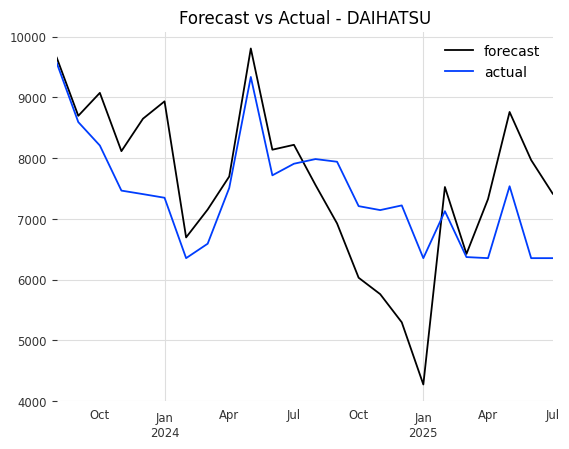

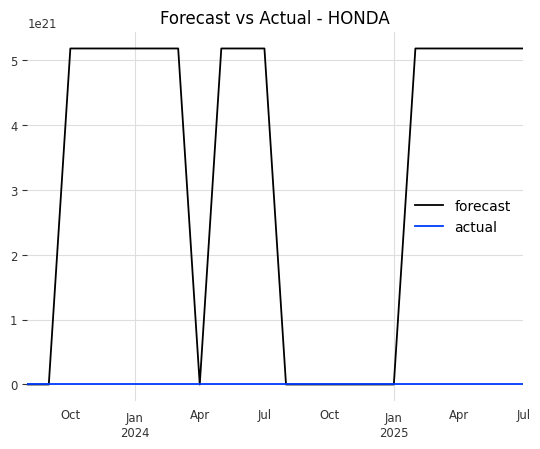

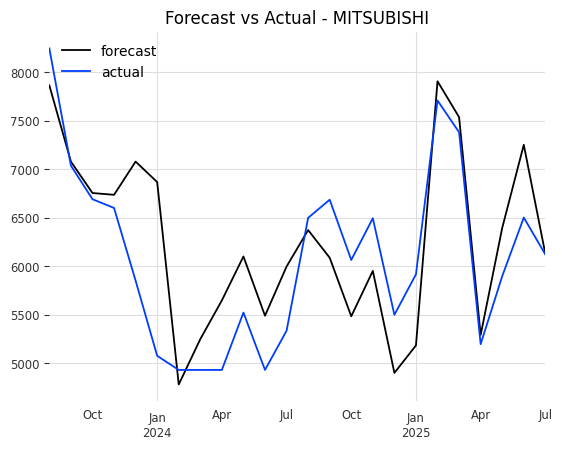

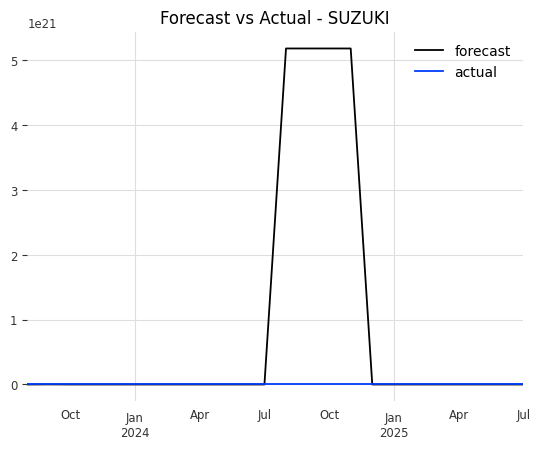

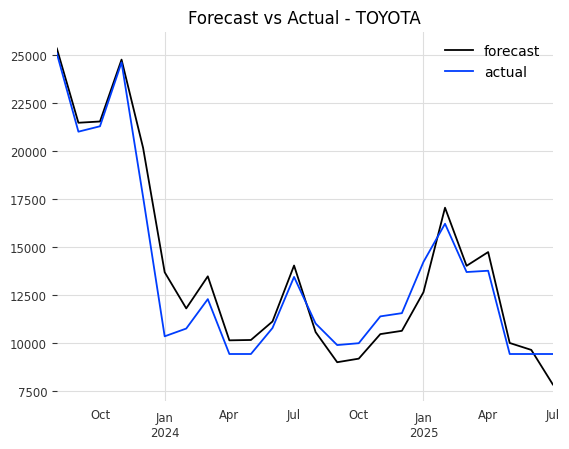

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

for s, bt in backtest_summary.items():
    # Dapatkan nilai aktual dan prediksi, pastikan keduanya dalam skala level (bukan log)
    actual_invert = np.expm1(bt['y_true_all'].values)
    fr_invert = bt['y_pred_all']

    # Ambil index dari actual_invert (karena ini yang lebih pasti)
    index_actual = bt['y_true_all'].index

    # Selaraskan index fr_invert dengan index_actual
    fr_invert_series = pd.Series(fr_invert, index=index_actual)

    # Plot perbandingan antara forecast dan actual
    # plt.figure(figsize=(8, 4))
    fr_invert_series.plot(label="forecast")
    pd.Series(actual_invert, index=index_actual).plot(label="actual")

    # Berikan judul dan tampilkan legend
    plt.title(f"Forecast vs Actual - {s}")
    plt.legend()
    plt.show()
